# United Nations Voting Data Analysis

This notebook analyzes the UN voting data from the `UN DATA.csv` file.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
# Load the UN voting data
file_path = 'UN DATA.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (7855, 270)

First 5 rows:


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11128\570137410.py:3: DtypeWarning: Columns (228,229,230,232,235,236,238,239,240,241,242,243,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Council,Date,Title,Resolution,TOTAL VOTES,NO-VOTE COUNT,ABSENT COUNT,NO COUNT,YES COUNT,Link,...,BOLIVIA (PLUNATIONAL STATE OF),SIAM,REPULIC OF MOLDOVA,PHILIPPINE REPUBLIC,SURINAM,BELGIUM,SAINT CHRISTOPHER AND NEVIS,TKAZAKHSTAN,DEMOCRATIC CAMPUCHEA,CONGO (DEMOCRATIC REPUBLIC OF)
0,Security Council,2016-12-13,Security Council resolution 2323 (2016) [on ex...,S/RES/2323(2016),15,0,0,0,15,https://digitallibrary.un.org/record/852025?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Security Council,2020-06-22,Security Council resolution 2527 (2020) [on ex...,S/RES/2527(2020),15,0,0,0,15,https://digitallibrary.un.org/record/3866679?l...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Security Council,2016-12-14,Security Council resolution 2324 (2016) [on Se...,S/RES/2324(2016),15,0,0,0,15,https://digitallibrary.un.org/record/852028?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Security Council,2016-12-12,Security Council resolution 2322 (2016) [on in...,S/RES/2322(2016),15,0,0,0,15,https://digitallibrary.un.org/record/852020?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Security Council,2005-09-23,Security Council resolution 1627 (2005) [on ex...,S/RES/1627(2005),15,0,0,0,15,https://digitallibrary.un.org/record/557118?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check column names and data types
print("Column names:")
for col in df.columns:
    print(f"- {col}")

print("\nData types:")
df.dtypes

Column names:
- Council
- Date
- Title
- Resolution
- TOTAL VOTES
- NO-VOTE COUNT
- ABSENT COUNT
- NO COUNT
- YES COUNT
- Link
- token
- SENEGAL
- MALAYSIA
- VENEZUELA (BOLIVARIAN REPUBLIC OF)
- UNITED KINGDOM
- RUSSIAN FEDERATION
- JAPAN
- ANGOLA
- URUGUAY
- SPAIN
- EGYPT
- NEW ZEALAND
- UNITED STATES
- FRANCE
- CHINA
- UKRAINE
- NIGER
- SAINT VINCENT AND THE GRENADINES
- ESTONIA
- SOUTH AFRICA
- VIET NAM
- BELGIUM
- GERMANY
- TUNISIA
- INDONESIA
- DOMINICAN REPUBLIC
- BRAZIL
- UNITED REPUBLIC OF TANZANIA
- PHILIPPINES
- ALGERIA
- BENIN
- DENMARK
- ROMANIA
- ARGENTINA
- GREECE
- AUSTRIA
- SWITZERLAND
- CYPRUS
- MOZAMBIQUE
- SUDAN
- FIJI
- BULGARIA
- CUBA
- UGANDA
- ZAMBIA
- SOUTH SUDAN
- MONACO
- REPUBLIC OF KOREA
- REPUBLIC OF MOLDOVA
- SAN MARINO
- YEMEN
- ITALY
- BURUNDI
- HUNGARY
- CAMBODIA
- MALAWI
- NAURU
- NICARAGUA
- BRUNEI DARUSSALAM
- POLAND
- THAILAND
- MALDIVES
- SIERRA LEONE
- TURKEY
- CABO VERDE
- PAPUA NEW GUINEA
- MARSHALL ISLANDS
- AZERBAIJAN
- MADAGASCAR
- CAMEROON
-

Council                           object
Date                              object
Title                             object
Resolution                        object
TOTAL VOTES                        int64
                                   ...  
 BELGIUM                          object
SAINT CHRISTOPHER AND NEVIS       object
TKAZAKHSTAN                       object
DEMOCRATIC CAMPUCHEA              object
CONGO (DEMOCRATIC REPUBLIC OF)    object
Length: 270, dtype: object

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
missing_values[missing_values > 0]

## Basic Analysis of Voting Patterns

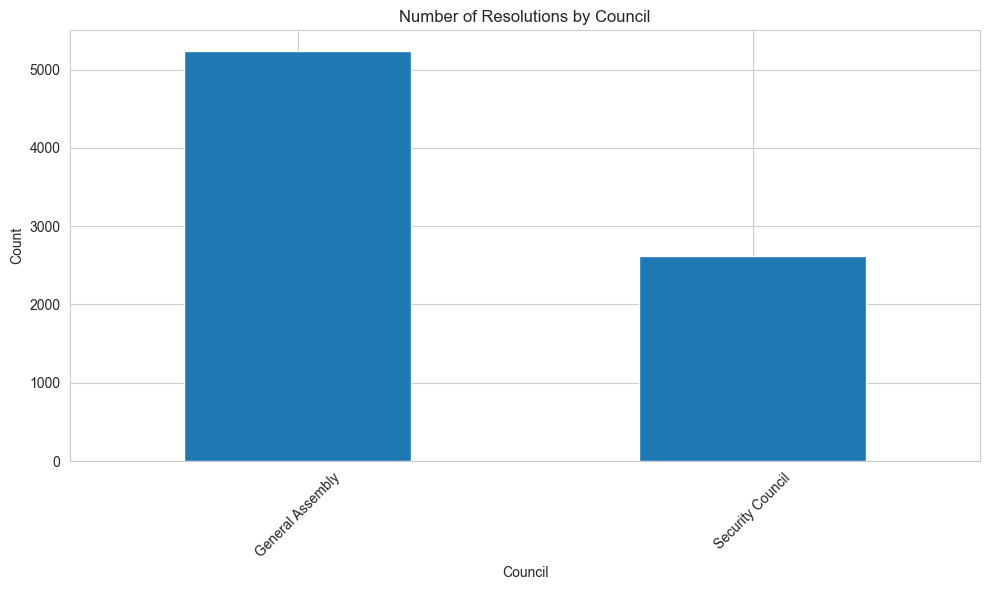

In [6]:
# Distribution of votes by council
council_counts = df['Council'].value_counts()
plt.figure(figsize=(10, 6))
council_counts.plot(kind='bar')
plt.title('Number of Resolutions by Council')
plt.xlabel('Council')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

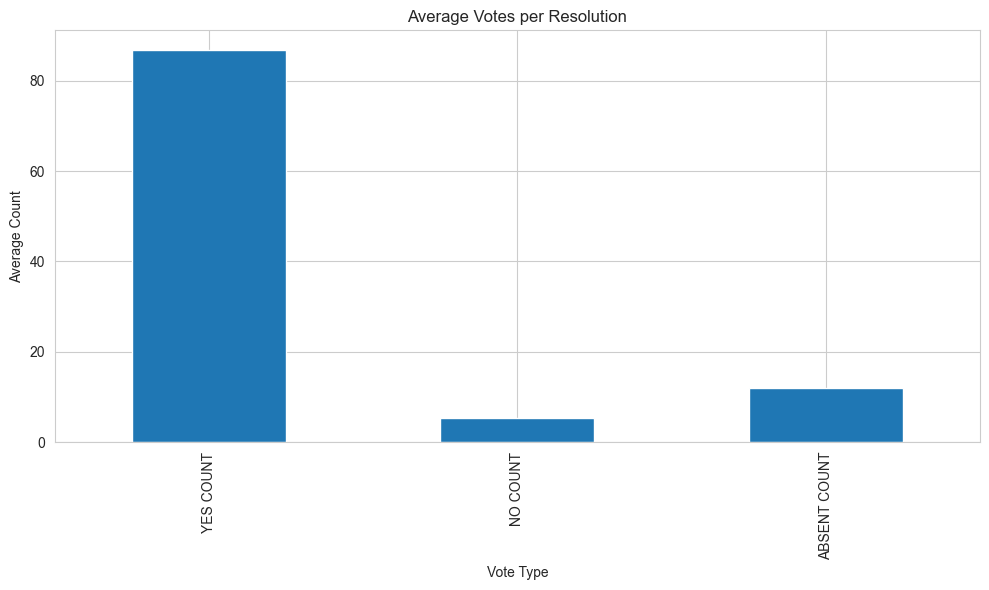

In [7]:
# Analyze voting patterns (YES, NO, ABSENT, etc.)
vote_columns = ['YES COUNT', 'NO COUNT', 'ABSENT COUNT']
vote_data = df[vote_columns]

# Calculate average votes per resolution
avg_votes = vote_data.mean()
plt.figure(figsize=(10, 6))
avg_votes.plot(kind='bar')
plt.title('Average Votes per Resolution')
plt.xlabel('Vote Type')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

## Analysis of Specific Countries' Voting Patterns

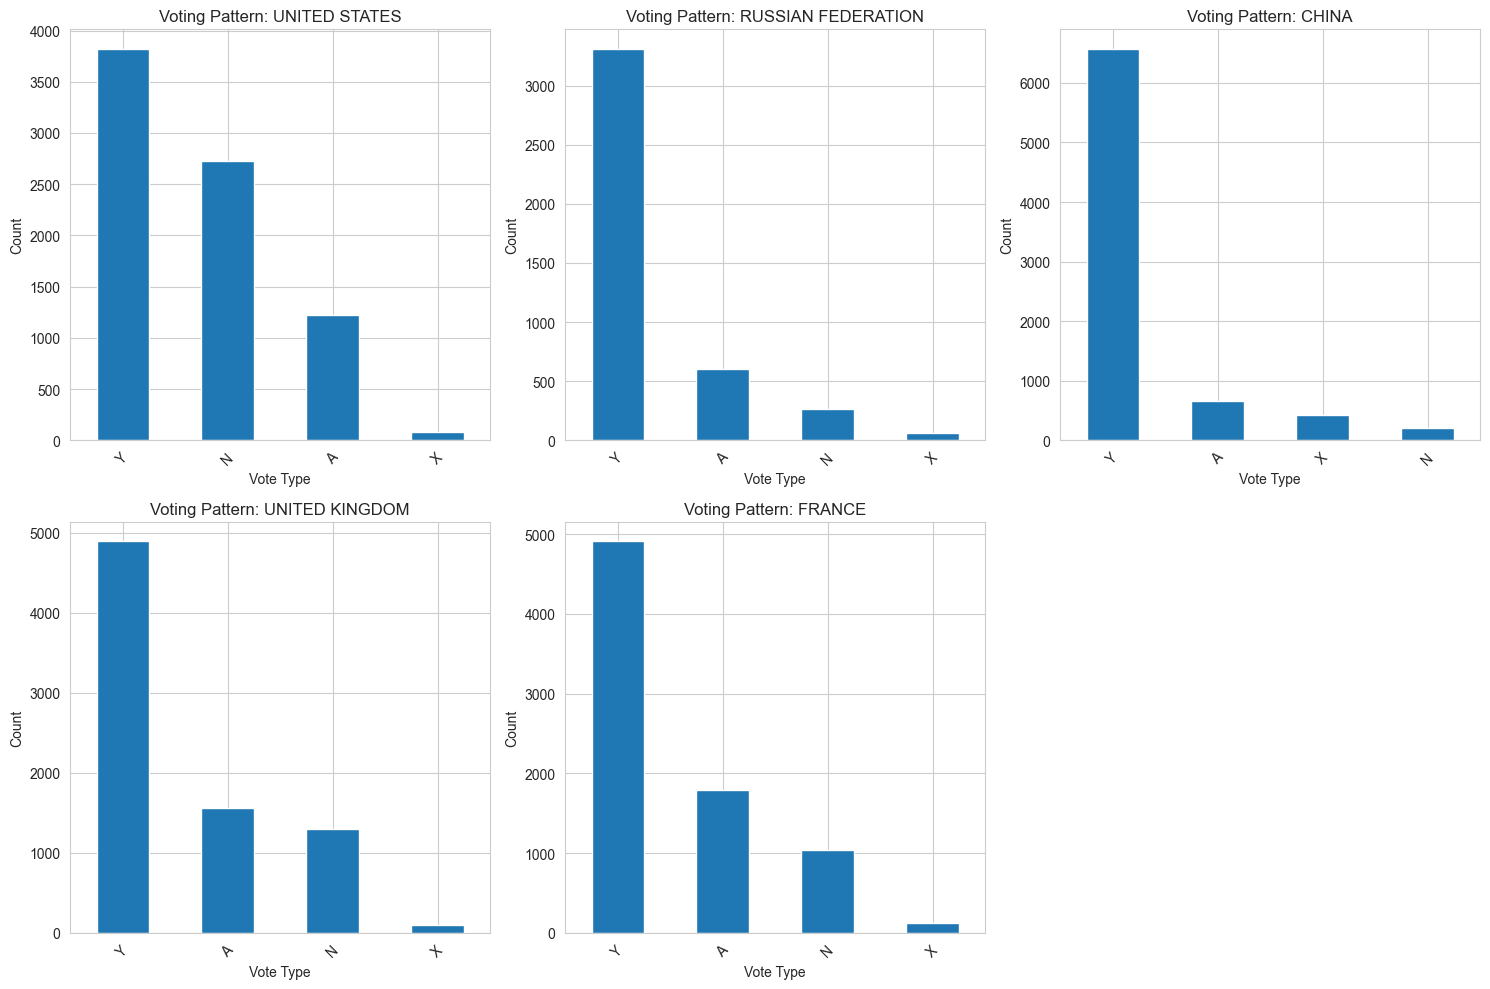

In [8]:
# Select a few major countries to analyze
countries = ['UNITED STATES', 'RUSSIAN FEDERATION', 'CHINA', 'UNITED KINGDOM', 'FRANCE']

# Function to count vote types for a country
def count_vote_types(country):
    vote_counts = df[country].value_counts()
    return vote_counts

# Create a plot for each country
plt.figure(figsize=(15, 10))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 3, i)
    vote_counts = count_vote_types(country)
    vote_counts.plot(kind='bar')
    plt.title(f'Voting Pattern: {country}')
    plt.xlabel('Vote Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Voting Agreement Analysis

TypeError: Image data of dtype object cannot be converted to float

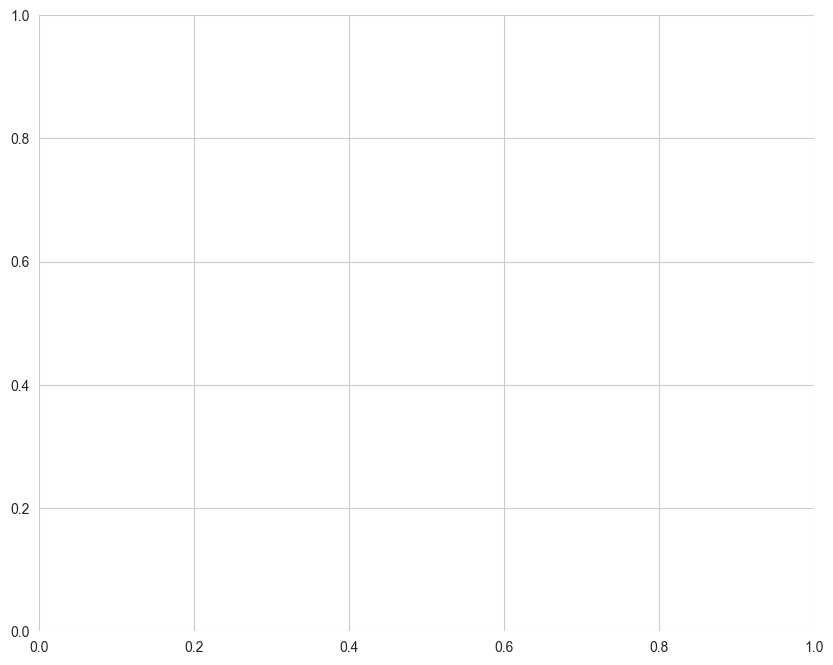

In [9]:
# Function to calculate agreement percentage between two countries
def calculate_agreement(country1, country2):
    # Filter rows where both countries have valid votes (not NaN)
    valid_votes = df.dropna(subset=[country1, country2])
    
    # Count agreements
    agreements = (valid_votes[country1] == valid_votes[country2]).sum()
    total = len(valid_votes)
    
    if total > 0:
        return (agreements / total) * 100
    else:
        return 0

# Create a matrix of agreement percentages
agreement_matrix = pd.DataFrame(index=countries, columns=countries)

for country1 in countries:
    for country2 in countries:
        agreement_matrix.loc[country1, country2] = calculate_agreement(country1, country2)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(agreement_matrix, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Voting Agreement Between Countries (%)')
plt.tight_layout()
plt.show()

## Analysis by Resolution Topics

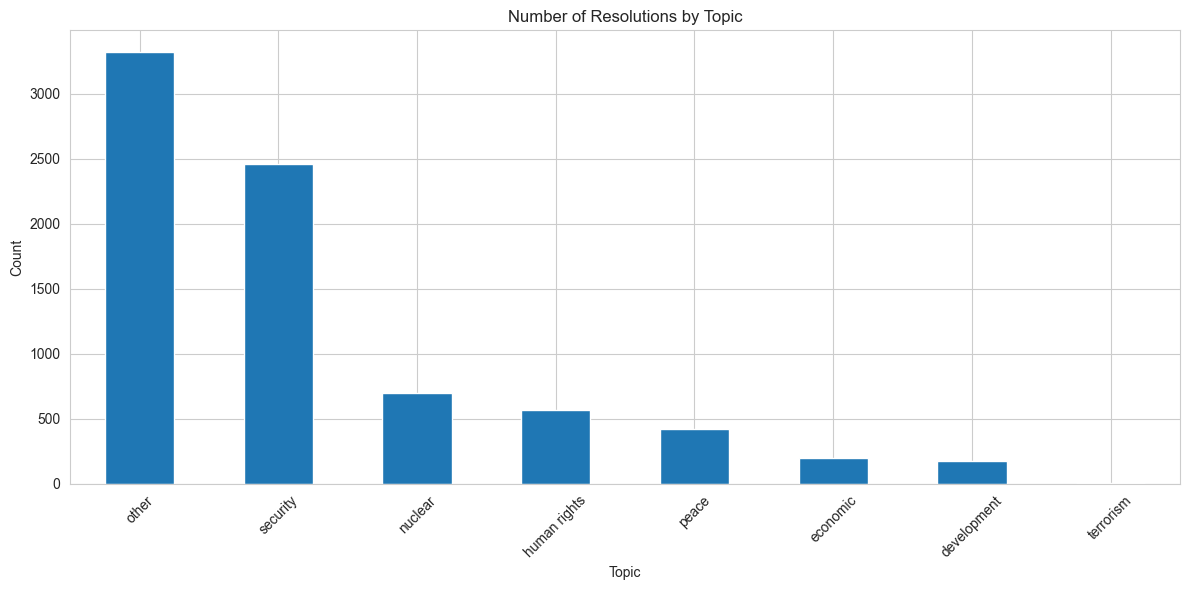

In [10]:
# Extract keywords from resolution titles
def extract_keywords(title):
    keywords = ['nuclear', 'human rights', 'peace', 'security', 'economic', 'development', 'terrorism']
    title_lower = title.lower()
    for keyword in keywords:
        if keyword in title_lower:
            return keyword
    return 'other'

# Apply the function to create a new column
df['Topic'] = df['Title'].apply(extract_keywords)

# Count resolutions by topic
topic_counts = df['Topic'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title('Number of Resolutions by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# --- Check the distribution of resolutions by Council ---
# Assuming your column indicating the council is named 'Council'
# If your column name is different, replace 'Council' below
if 'Council' in df.columns:
    print("\nResolution Counts by Council Type:")
    print(df['Council'].value_counts())
else:
    print("\nWarning: 'Council' column not found. Cannot show counts by council type.")


# --- Analyze the number of resolutions per year ---
# Assuming your date column is named 'Date'
# Convert the 'Date' column to datetime objects if it's not already
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        print("\n'Date' column converted to datetime.")

        # Extract the year and count resolutions per year
        df['Year'] = df['Date'].dt.year
        resolutions_per_year = df['Year'].value_counts().sort_index()

        print("\nNumber of Resolutions per Year:")
        print(resolutions_per_year.head()) # Show first few years
        print("...")
        print(resolutions_per_year.tail()) # Show last few years

        # Optional: Plot resolutions per year
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        resolutions_per_year.plot(kind='line')
        plt.title('Number of UN Resolutions Over Time (1946-2021)')
        plt.xlabel('Year')
        plt.ylabel('Number of Resolutions')
        plt.grid(True)
        plt.show()

    except KeyError:
         print("\nWarning: 'Date' column not found. Cannot analyze resolutions over time.")
    except Exception as e:
        print(f"\nError processing 'Date' column: {e}")

else:
    print("\nWarning: 'Date' column not found. Cannot analyze resolutions over time.")


Resolution Counts by Council Type:
Council
General Assembly    5238
Security Council    2617
Name: count, dtype: int64

Error processing 'Date' column: time data "2011" doesn't match format "%Y-%m-%d", at position 237. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


## Temporal Analysis

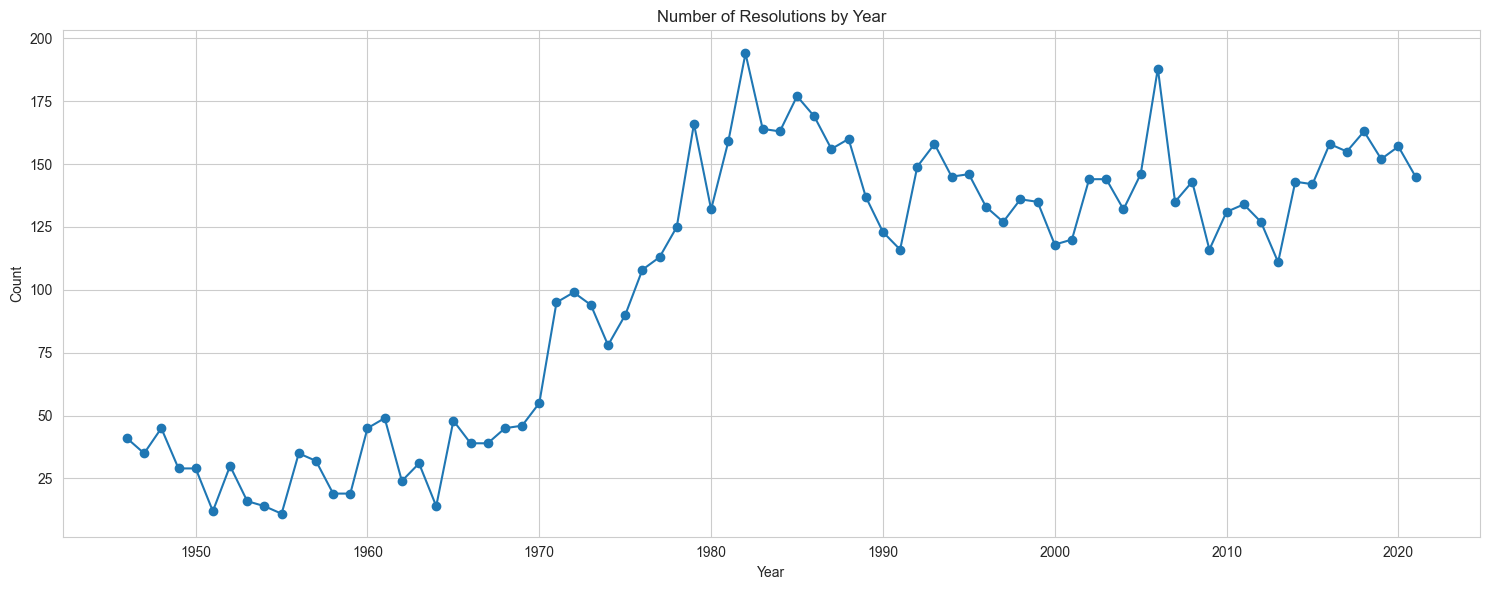

In [11]:
# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# Count resolutions by year
yearly_counts = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Resolutions by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

This notebook provides a basic analysis of UN voting patterns. Further analysis could include:

1. More detailed topic modeling using NLP techniques
2. Clustering countries based on voting similarity
3. Analyzing voting patterns on specific issues over time
4. Examining the relationship between voting patterns and geopolitical events

In [13]:
# --- Check the distribution of resolutions by Council ---
# Assuming your column indicating the council is named 'Council'
# If your column name is different, replace 'Council' below
if 'Council' in df.columns:
    print("\nResolution Counts by Council Type:")
    print(df['Council'].value_counts())
else:
    print("\nWarning: 'Council' column not found. Cannot show counts by council type.")


# --- Analyze the number of resolutions per year ---
# Assuming your date column is named 'Date'
# Convert the 'Date' column to datetime objects if it's not already
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        print("\n'Date' column converted to datetime.")

        # Extract the year and count resolutions per year
        df['Year'] = df['Date'].dt.year
        resolutions_per_year = df['Year'].value_counts().sort_index()

        print("\nNumber of Resolutions per Year:")
        print(resolutions_per_year.head()) # Show first few years
        print("...")
        print(resolutions_per_year.tail()) # Show last few years

        # Optional: Plot resolutions per year
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        resolutions_per_year.plot(kind='line')
        plt.title('Number of UN Resolutions Over Time (1946-2021)')
        plt.xlabel('Year')
        plt.ylabel('Number of Resolutions')
        plt.grid(True)
        plt.show()

    except KeyError:
         print("\nWarning: 'Date' column not found. Cannot analyze resolutions over time.")
    except Exception as e:
        print(f"\nError processing 'Date' column: {e}")

else:
    print("\nWarning: 'Date' column not found. Cannot analyze resolutions over time.")


Resolution Counts by Council Type:
Council
General Assembly    5238
Security Council    2617
Name: count, dtype: int64

Error processing 'Date' column: time data "2011" doesn't match format "%Y-%m-%d", at position 237. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [14]:
# --- Analyze the overall distribution of vote types ---
# This requires looking at ALL the columns that contain individual country votes.
# You need to identify these columns again based on your DataFrame structure.
# In Step 2, we assumed these started from a certain index or were a list of column names.
# Let's use the `country_vote_cols` variable we used (or created) in Step 2.

# --- IMPORTANT: Ensure `country_vote_cols` correctly identifies your vote columns ---
# Example if columns from index 5 onwards are country votes:
# start_idx_vote = 5
# country_vote_cols = df.columns[start_idx_vote:]

# If you used a list of country names:
# country_vote_cols = ['USA', 'GBR', 'FRA', ...] # Replace with your actual list

if 'country_vote_cols' in locals() and len(country_vote_cols) > 0:
    print("\nAnalyzing Distribution of Vote Types across all vote columns:")

    # Stack the vote columns to count all vote types together
    all_votes = df[country_vote_cols].stack().reset_index(drop=True)

    # Count the occurrences of each vote type (1, 0, NaN, or original if not converted)
    # We need to be careful here if we converted to 1/0/NaN.
    # Let's count non-NaN occurrences first, then count NaNs separately.

    vote_counts = all_votes.value_counts(dropna=False) # dropna=False includes NaN count

    print("\nOverall Distribution of Vote Types (1=Y, 0=N, NaN=X/A/[EMPTY]):")
    print(vote_counts)

    # Calculate percentages
    vote_percentages = vote_counts / vote_counts.sum() * 100
    print("\nOverall Percentage Distribution of Vote Types:")
    print(vote_percentages)

    # Optional: Visualize the vote distribution
    plt.figure(figsize=(8, 6))
    vote_counts.plot(kind='bar')
    plt.title('Overall Distribution of UN Vote Types')
    plt.xlabel('Vote Type (1=Y, 0=N, NaN=X/A/Empty)')
    plt.ylabel('Number of Votes')
    plt.xticks(rotation=0)
    plt.show()

else:
    print("\nWarning: `country_vote_cols` variable not defined or is empty. Cannot analyze vote distribution.")
    print("Please ensure `country_vote_cols` correctly identifies the columns with country votes based on Step 2.")


# --- Optional: Analyze vote distribution by Council Type (GA vs SC) ---
# This is more advanced and requires grouping, let's keep it simple for now.
# We can revisit this if you want to compare voting patterns specifically between GA and SC.


Please ensure `country_vote_cols` correctly identifies the columns with country votes based on Step 2.


In [15]:
# --- IMPORTANT: This step ASSUMES `country_vote_cols` is correctly defined from Step 2 ---
# It will not work correctly otherwise.

# Select only the columns containing country votes
# Ensure these columns are in a format where agreement can be calculated (e.g., 1s, 0s, NaN)
# As prepared in Step 2 (Y->1, N->0, X/A/Empty->NaN)
if 'country_vote_cols' in locals() and len(country_vote_cols) > 0:

    print("\nStarting to calculate country agreement matrix...")

    # Create a new DataFrame containing only the relevant vote columns
    # We drop rows where ALL vote columns are NaN if they aren't useful
    vote_df = df[country_vote_cols] # .dropna(how='all') # Uncomment .dropna if you want to exclude resolutions with no votes cast

    # Calculate the agreement matrix
    # We'll use a simple method: count agreements on non-NaN votes

    # Initialize an empty agreement matrix
    agreement_matrix = pd.DataFrame(index=country_vote_cols, columns=country_vote_cols, dtype=float)

    # Calculate agreement for each pair of countries
    for country1 in country_vote_cols:
        for country2 in country_vote_cols:
            if country1 == country2:
                agreement_matrix.loc[country1, country2] = 1.0 # A country always agrees with itself
            else:
                # Get votes for the two countries, dropping pairs where either is NaN
                # We only compare votes where both countries actually cast a vote (Y or N in our 1/0 scheme)
                # If you kept X/A as other values, adjust the filtering here
                comparison_votes = vote_df[[country1, country2]].dropna()

                if len(comparison_votes) > 0:
                    # Count where votes are identical (both 1 or both 0)
                    # (comparison_votes[country1] == comparison_votes[country2]) gives a boolean Series (True for agreement)
                    # .sum() counts the number of True values
                    agreements = (comparison_votes[country1] == comparison_votes[country2]).sum()

                    # Calculate percentage agreement
                    agreement_percentage = (agreements / len(comparison_votes)) * 100
                    agreement_matrix.loc[country1, country2] = agreement_percentage
                else:
                    # If no resolutions where both countries cast a comparable vote
                    agreement_matrix.loc[country1, country2] = np.nan # Or 0, depending on how you want to represent no common votes


    print("\nAgreement Matrix (first 5x5):")
    print(agreement_matrix.head())

    # Optional: Display a heatmap of the agreement matrix (might be slow/unreadable for many countries)
    # import seaborn as sns
    # plt.figure(figsize=(15, 12))
    # sns.heatmap(agreement_matrix.head(10).iloc[:, :10], annot=True, cmap='viridis', fmt=".1f") # Displaying only first 10x10
    # plt.title('Country Voting Agreement Heatmap (First 10 Countries)')
    # plt.show()


else:
    print("\nERROR: `country_vote_cols` is not defined correctly. Cannot calculate agreement matrix.")
    print("Please go back to Step 2 and ensure the `country_vote_cols` variable correctly identifies your country vote columns.")


ERROR: `country_vote_cols` is not defined correctly. Cannot calculate agreement matrix.
Please go back to Step 2 and ensure the `country_vote_cols` variable correctly identifies your country vote columns.


In [16]:
# --- IMPORTANT: Replace with the ACTUAL names of your country vote columns ---
country_vote_cols = ['ColumnNameForUSA', 'ColumnNameForUK', 'ColumnNameForFrance', 'ColumnNameForChina', 'ColumnNameForRussia',
                     'AnotherCountryColumn', 'YetAnotherCountryColumn'] # <--- ADD ALL YOUR COUNTRY VOTE COLUMN NAMES HERE
# ---------------------------------------------------------------------------

# The rest of your Step 2 code (mapping Y/N/X/A/[EMPTY]) will use this list
for col in country_vote_cols:
     if col in df.columns: # Check if the column exists
         if df[col].dtype == 'object': # Check data type before mapping
             # Define your mapping - adjust if you want to treat X/A differently
             vote_mapping = {'Y': 1, 'N': 0, 'X': np.nan, 'A': np.nan}
             df[col] = df[col].map(vote_mapping)
         # else: print(f"Skipping column '{col}' as it's not object type, already processed?") # Optional: uncomment for debugging
     else:
         print(f"Warning: Column '{col}' from country_vote_cols list not found in DataFrame.")

print("\nDataFrame head after vote cleaning (check vote columns):")
print(df.head())
print("\nData types after conversion:")
print(df.info())


DataFrame head after vote cleaning (check vote columns):
            Council        Date  \
0  Security Council  2016-12-13   
1  Security Council  2020-06-22   
2  Security Council  2016-12-14   
3  Security Council  2016-12-12   
4  Security Council  2005-09-23   

                                               Title        Resolution  \
0  Security Council resolution 2323 (2016) [on ex...  S/RES/2323(2016)   
1  Security Council resolution 2527 (2020) [on ex...  S/RES/2527(2020)   
2  Security Council resolution 2324 (2016) [on Se...  S/RES/2324(2016)   
3  Security Council resolution 2322 (2016) [on in...  S/RES/2322(2016)   
4  Security Council resolution 1627 (2005) [on ex...  S/RES/1627(2005)   

   TOTAL VOTES  NO-VOTE COUNT  ABSENT COUNT  NO COUNT  YES COUNT  \
0           15              0             0         0         15   
1           15              0             0         0         15   
2           15              0             0         0         15   
3           15

In [17]:
# --- IMPORTANT: Replace start_idx and end_idx with the ACTUAL index numbers ---
# Example: if country vote columns start at index 5 and end at index 200
start_idx_vote = 5  # <--- Replace with the index of the FIRST country vote column
end_idx_vote = 201  # <--- Replace with the index *AFTER* the LAST country vote column (Python slicing is exclusive)

country_vote_cols = df.columns[start_idx_vote : end_idx_vote]
# If they go to the very end, you can use:
# country_vote_cols = df.columns[start_idx_vote:]
# ---------------------------------------------------------------------------

print(f"Identified {len(country_vote_cols)} potential vote columns (first 5): {list(country_vote_cols[:5])}")


# The rest of your Step 2 code (mapping Y/N/X/A/[EMPTY]) will use this slice
for col in country_vote_cols:
     if df[col].dtype == 'object': # Check data type before mapping
         # Define your mapping - adjust if you want to treat X/A differently
         vote_mapping = {'Y': 1, 'N': 0, 'X': np.nan, 'A': np.nan}
         df[col] = df[col].map(vote_mapping)
     # else: print(f"Skipping column '{col}' as it's not object type, already processed?") # Optional: uncomment for debugging


print("\nDataFrame head after vote cleaning (check vote columns):")
print(df.head())
print("\nData types after conversion:")
print(df.info())

Identified 196 potential vote columns (first 5): ['NO-VOTE COUNT', 'ABSENT COUNT', 'NO COUNT', 'YES COUNT', 'Link']

DataFrame head after vote cleaning (check vote columns):
            Council        Date  \
0  Security Council  2016-12-13   
1  Security Council  2020-06-22   
2  Security Council  2016-12-14   
3  Security Council  2016-12-12   
4  Security Council  2005-09-23   

                                               Title        Resolution  \
0  Security Council resolution 2323 (2016) [on ex...  S/RES/2323(2016)   
1  Security Council resolution 2527 (2020) [on ex...  S/RES/2527(2020)   
2  Security Council resolution 2324 (2016) [on Se...  S/RES/2324(2016)   
3  Security Council resolution 2322 (2016) [on in...  S/RES/2322(2016)   
4  Security Council resolution 1627 (2005) [on ex...  S/RES/1627(2005)   

   TOTAL VOTES  NO-VOTE COUNT  ABSENT COUNT  NO COUNT  YES COUNT  Link  ...  \
0           15              0             0         0         15   NaN  ...   
1           

In [18]:
# --- IMPORTANT: This step ASSUMES `country_vote_cols` is correctly defined from Step 2 ---
# It will not work correctly otherwise.

# Select only the columns containing country votes
# Ensure these columns are in a format where agreement can be calculated (e.g., 1s, 0s, NaN)
# As prepared in Step 2 (Y->1, N->0, X/A/Empty->NaN)
if 'country_vote_cols' in locals() and len(country_vote_cols) > 0:

    print("\nStarting to calculate country agreement matrix...")

    # Create a new DataFrame containing only the relevant vote columns
    # We drop rows where ALL vote columns are NaN if they aren't useful
    vote_df = df[country_vote_cols] # .dropna(how='all') # Uncomment .dropna if you want to exclude resolutions with no votes cast

    # Calculate the agreement matrix
    # We'll use a simple method: count agreements on non-NaN votes

    # Initialize an empty agreement matrix
    agreement_matrix = pd.DataFrame(index=country_vote_cols, columns=country_vote_cols, dtype=float)

    # Calculate agreement for each pair of countries
    for country1 in country_vote_cols:
        for country2 in country_vote_cols:
            if country1 == country2:
                agreement_matrix.loc[country1, country2] = 1.0 # A country always agrees with itself
            else:
                # Get votes for the two countries, dropping pairs where either is NaN
                # We only compare votes where both countries actually cast a vote (Y or N in our 1/0 scheme)
                # If you kept X/A as other values, adjust the filtering here
                comparison_votes = vote_df[[country1, country2]].dropna()

                if len(comparison_votes) > 0:
                    # Count where votes are identical (both 1 or both 0)
                    # (comparison_votes[country1] == comparison_votes[country2]) gives a boolean Series (True for agreement)
                    # .sum() counts the number of True values
                    agreements = (comparison_votes[country1] == comparison_votes[country2]).sum()

                    # Calculate percentage agreement
                    agreement_percentage = (agreements / len(comparison_votes)) * 100
                    agreement_matrix.loc[country1, country2] = agreement_percentage
                else:
                    # If no resolutions where both countries cast a comparable vote
                    agreement_matrix.loc[country1, country2] = np.nan # Or 0, depending on how you want to represent no common votes


    print("\nAgreement Matrix (first 5x5):")
    print(agreement_matrix.head())

    # Optional: Display a heatmap of the agreement matrix (might be slow/unreadable for many countries)
    # import seaborn as sns
    # plt.figure(figsize=(15, 12))
    # sns.heatmap(agreement_matrix.head(10).iloc[:, :10], annot=True, cmap='viridis', fmt=".1f") # Displaying only first 10x10
    # plt.title('Country Voting Agreement Heatmap (First 10 Countries)')
    # plt.show()


else:
    print("\nERROR: `country_vote_cols` is not defined correctly. Cannot calculate agreement matrix.")
    print("Please go back to Step 2 and ensure the `country_vote_cols` variable correctly identifies your country vote columns.")


Starting to calculate country agreement matrix...

Agreement Matrix (first 5x5):
               NO-VOTE COUNT  ABSENT COUNT   NO COUNT  YES COUNT  Link  token  \
NO-VOTE COUNT       1.000000     28.465945  33.227244   0.000000   NaN    0.0   
ABSENT COUNT       28.465945      1.000000  31.164863   0.585614   NaN    0.0   
NO COUNT           33.227244     31.164863   1.000000   0.572884   NaN    0.0   
YES COUNT           0.000000      0.585614   0.572884   1.000000   NaN    0.0   
Link                     NaN           NaN        NaN        NaN   1.0    NaN   

                 SENEGAL   MALAYSIA  VENEZUELA (BOLIVARIAN REPUBLIC OF)  \
NO-VOTE COUNT   0.392238   0.382294                            0.265604   
ABSENT COUNT    6.606111   6.901408                            6.108898   
NO COUNT       13.315442  13.219316                           10.956175   
YES COUNT       0.000000   0.000000                            0.000000   
Link                 NaN        NaN                     

In [19]:
if df is not None:
    print(df.head()) # This shows the first few rows and column names
    print(df.info()) # This shows column names, non-null counts, and data types

            Council        Date  \
0  Security Council  2016-12-13   
1  Security Council  2020-06-22   
2  Security Council  2016-12-14   
3  Security Council  2016-12-12   
4  Security Council  2005-09-23   

                                               Title        Resolution  \
0  Security Council resolution 2323 (2016) [on ex...  S/RES/2323(2016)   
1  Security Council resolution 2527 (2020) [on ex...  S/RES/2527(2020)   
2  Security Council resolution 2324 (2016) [on Se...  S/RES/2324(2016)   
3  Security Council resolution 2322 (2016) [on in...  S/RES/2322(2016)   
4  Security Council resolution 1627 (2005) [on ex...  S/RES/1627(2005)   

   TOTAL VOTES  NO-VOTE COUNT  ABSENT COUNT  NO COUNT  YES COUNT  Link  ...  \
0           15              0             0         0         15   NaN  ...   
1           15              0             0         0         15   NaN  ...   
2           15              0             0         0         15   NaN  ...   
3           15              

In [22]:
import numpy as np # Make sure numpy is imported

# --- CORRECTLY Identify the columns with country votes ---
# Based on your df.head() output, the country vote columns start after the info columns.
# Find the NAME of the first column that represents a country's vote.
first_country_column_name = 'REPULIC OF MOLDOVA' # <-- REPLACE THIS with the ACTUAL name of the first country column

# Find the index of this first country column
if first_country_column_name in df.columns:
    first_country_column_index = df.columns.get_loc(first_country_column_name)
    # Slice all columns from this index to the end of the DataFrame
    country_vote_cols = df.columns[first_country_column_index:].tolist()
    print(f"\nSuccessfully identified {len(country_vote_cols)} country vote columns starting from '{first_country_column_name}'.")
    print("First 5 vote columns:", country_vote_cols[:5])

else:
    print(f"\nERROR: The column '{first_country_column_name}' was not found.")
    print("Please check the spelling or identify the correct name of the first country vote column from df.head().")
    country_vote_cols = [] # Set to empty list if column not found


# --- Now, apply the cleaning/mapping to these identified columns ---
if country_vote_cols: # Proceed only if country_vote_cols was successfully defined
    print("\nApplying vote mapping...")
    # Define the mapping: Y->1, N->0, X/A/[EMPTY]->NaN
    vote_mapping = {'Y': 1, 'N': 0, 'X': np.nan, 'A': np.nan, '[EMPTY]': np.nan} # Added [EMPTY] explicitly just in case

    # Apply this mapping to all identified country vote columns
    for col in country_vote_cols:
         # Ensure the column is of object type (strings) before mapping, or check if it contains mappable values
         # We can apply map directly, it will ignore values not in the mapping (like NaNs already there)
         original_dtype = df[col].dtype
         df[col] = df[col].map(vote_mapping)
         # Optional: Check if dtype changed, indicates mapping occurred
         # if df[col].dtype != original_dtype:
         #     print(f"Mapped column {col}. Dtype changed from {original_dtype} to {df[col].dtype}")


    print("\nDataFrame head after vote cleaning (check values in country vote columns):")
    print(df.head()[['Council', 'Date', 'TOTAL VOTES'] + country_vote_cols[:5]]) # Display some info columns + first 5 vote columns
    print("\nData types after conversion (check data types of country vote columns):")
    print(df[country_vote_cols].info()) # Show info only for the vote columns


else:
    print("\nCannot proceed with vote cleaning as country vote columns were not identified.")


Successfully identified 10 country vote columns starting from 'REPULIC OF MOLDOVA'.
First 5 vote columns: ['REPULIC OF MOLDOVA', 'PHILIPPINE REPUBLIC', 'SURINAM', ' BELGIUM', 'SAINT CHRISTOPHER AND NEVIS']

Applying vote mapping...

DataFrame head after vote cleaning (check values in country vote columns):
            Council        Date  TOTAL VOTES  REPULIC OF MOLDOVA  \
0  Security Council  2016-12-13           15                 NaN   
1  Security Council  2020-06-22           15                 NaN   
2  Security Council  2016-12-14           15                 NaN   
3  Security Council  2016-12-12           15                 NaN   
4  Security Council  2005-09-23           15                 NaN   

   PHILIPPINE REPUBLIC  SURINAM   BELGIUM  SAINT CHRISTOPHER AND NEVIS  
0                  NaN      NaN       NaN                          NaN  
1                  NaN      NaN       NaN                          NaN  
2                  NaN      NaN       NaN                      

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7855 entries, 0 to 7854
Columns: 272 entries, Council to Year
dtypes: float64(201), int64(6), object(65)
memory usage: 16.3+ MB


In [24]:
import pandas as pd
import numpy as np # Make sure numpy is also imported as we use np.nan later

# Replace 'your_un_data_file.csv' with the actual path to your file
file_path_csv = 'your_un_data_file.csv'
file_path_excel = 'your_un_data_file.xlsx' # Or your actual excel file name

df = None # Initialize df

try:
    # Try reading as CSV first
    print(f"Attempting to load data from {file_path_csv}...")
    df = pd.read_csv(file_path_csv)
    print("Successfully loaded data from CSV.")
except FileNotFoundError:
    try:
        # If CSV fails, try reading as Excel (e.g., .xlsx)
        print(f"CSV not found, attempting to load data from {file_path_excel}...")
        df = pd.read_excel(file_path_excel)
        print("Successfully loaded data from Excel.")
    except FileNotFoundError:
        print("Error: Data file not found at specified paths.")
    except Exception as e:
        print(f"An error occurred while loading the Excel file: {e}")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")


# --- CRITICAL: Display head and info to identify columns ---
if df is not None:
    print("\nDataFrame Head (First 5 Rows):")
    print(df.head().to_markdown(index=False)) # Using to_markdown for better formatting here

    print("\nDataFrame Info (Column Names and Types):")
    df.info() # This shows all column names and their types

else:
    print("\nDataFrame could not be loaded.")

Attempting to load data from your_un_data_file.csv...
CSV not found, attempting to load data from your_un_data_file.xlsx...
Error: Data file not found at specified paths.

DataFrame could not be loaded.


In [25]:
import pandas as pd
import numpy as np # Make sure numpy is also imported as we use np.nan later

# --- CORRECTED FILE PATHS ---
# Use the exact name 'UN DATA.csv' as seen in your file explorer
file_path_csv = 'UN DATA.csv'
file_path_excel = 'UN DATA.xlsx' # Keep this in case, but it should find the CSV first
# ----------------------------

df = None # Initialize df

try:
    # Try reading as CSV first
    print(f"Attempting to load data from {file_path_csv}...")
    df = pd.read_csv(file_path_csv)
    print("Successfully loaded data from CSV.")
except FileNotFoundError:
    try:
        # If CSV fails, try reading as Excel (e.g., .xlsx)
        print(f"CSV not found, attempting to load data from {file_path_excel}...")
        df = pd.read_excel(file_path_excel)
        print("Successfully loaded data from Excel.")
    except FileNotFoundError:
        print("Error: Data file not found at specified paths.")
    except Exception as e:
        print(f"An error occurred while loading the Excel file: {e}")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")


# --- CRITICAL: Display head and info to identify columns ---
if df is not None:
    print("\nDataFrame Head (First 5 Rows):")
    # Using to_markdown for better formatting in chat, you can use print(df.head()) too
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

    print("\nDataFrame Info (Column Names and Types):")
    df.info() # This shows all column names and their types

else:
    print("\nDataFrame could not be loaded. Please check the file name and path.")

Attempting to load data from UN DATA.csv...


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11128\1333764396.py:15: DtypeWarning: Columns (228,229,230,232,235,236,238,239,240,241,242,243,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_csv)


Successfully loaded data from CSV.

DataFrame Head (First 5 Rows):


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [26]:
import pandas as pd
import numpy as np # Make sure numpy is also imported

# --- CORRECTED FILE PATHS ---
# Use the exact name 'UN DATA.csv' as seen in your file explorer
file_path_csv = 'UN DATA.csv'
file_path_excel = 'UN DATA.xlsx' # Keep this in case, but it should find the CSV first
# ----------------------------

df = None # Initialize df

try:
    # Try reading as CSV first
    print(f"Attempting to load data from {file_path_csv}...")
    df = pd.read_csv(file_path_csv)
    print("Successfully loaded data from CSV.")
except FileNotFoundError:
    try:
        # If CSV fails, try reading as Excel (e.g., .xlsx)
        print(f"CSV not found, attempting to load data from {file_path_excel}...")
        df = pd.read_excel(file_path_excel)
        print("Successfully loaded data from Excel.")
    except FileNotFoundError:
        print("Error: Data file not found at specified paths.")
    except Exception as e:
        print(f"An error occurred while loading the Excel file: {e}")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")


# --- CRITICAL: Display head and info to identify columns ---
if df is not None:
    print("\nDataFrame Head (First 5 Rows):")
    # --- CHANGED BACK TO STANDARD PRINT ---
    print(df.head())

    print("\nDataFrame Info (Column Names and Types):")
    df.info() # This shows all column names and their types

else:
    print("\nDataFrame could not be loaded. Please check the file name and path.")

Attempting to load data from UN DATA.csv...


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11128\3994117544.py:15: DtypeWarning: Columns (228,229,230,232,235,236,238,239,240,241,242,243,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_csv)


Successfully loaded data from CSV.

DataFrame Head (First 5 Rows):
            Council        Date  \
0  Security Council  2016-12-13   
1  Security Council  2020-06-22   
2  Security Council  2016-12-14   
3  Security Council  2016-12-12   
4  Security Council  2005-09-23   

                                               Title        Resolution  \
0  Security Council resolution 2323 (2016) [on ex...  S/RES/2323(2016)   
1  Security Council resolution 2527 (2020) [on ex...  S/RES/2527(2020)   
2  Security Council resolution 2324 (2016) [on Se...  S/RES/2324(2016)   
3  Security Council resolution 2322 (2016) [on in...  S/RES/2322(2016)   
4  Security Council resolution 1627 (2005) [on ex...  S/RES/1627(2005)   

   TOTAL VOTES  NO-VOTE COUNT  ABSENT COUNT  NO COUNT  YES COUNT  \
0           15              0             0         0         15   
1           15              0             0         0         15   
2           15              0             0         0         15   
3    

In [27]:
import numpy as np # Make sure numpy is imported

# --- CORRECTLY Identify the columns with country votes ---
# Based on df.info() and df.head(), country vote columns start *after* the 'Link' column.
# We will find the index of the 'Link' column and take all columns from the *next* index onwards.

if 'Link' in df.columns:
    link_column_index = df.columns.get_loc('Link')
    # Slice all columns from the index *after* 'Link' to the end of the DataFrame
    country_vote_cols = df.columns[link_column_index + 1:].tolist()

    print(f"\nSuccessfully identified {len(country_vote_cols)} country vote columns starting after 'Link'.")
    print("First 5 vote columns:", country_vote_cols[:5])
    # Print the last 5 to confirm the end
    print("Last 5 vote columns:", country_vote_cols[-5:])

else:
    print("\nERROR: 'Link' column not found. Cannot identify country vote columns using this method.")
    print("Please manually identify the first country column name from df.info() and use that instead.")
    country_vote_cols = [] # Set to empty list if identification fails


# --- Now, apply the cleaning/mapping to these identified columns ---
if country_vote_cols: # Proceed only if country_vote_cols was successfully defined
    print("\nApplying vote mapping...")
    # Define the mapping: Y->1, N->0, X/A/[EMPTY]->NaN
    # Explicitly mapping None, NaN, and the string '[EMPTY]' to np.nan
    # We need to handle potential variations in how missing values might be represented.
    vote_mapping = {'Y': 1, 'N': 0}
    # Values not in the mapping will become NaN by default using .map() on object columns,
    # but let's also explicitly handle some common missing representations just in case.
    values_to_nan = ['X', 'A', '[EMPTY]', '', ' ', None, np.nan] # Added empty strings and None

    for col in country_vote_cols:
        # Ensure the column is of object type (strings) before mapping or contains values that need replacing
        if df[col].dtype == 'object':
            # Replace variations of missing/abstain/no vote with NaN first
            df[col].replace(values_to_nan, np.nan, inplace=True)
            # Then map Y and N to 1 and 0. Values already NaN will remain NaN.
            df[col] = df[col].map(vote_mapping).fillna(df[col]) # Use fillna to keep existing NaNs

        # After mapping, columns might become float64 because of NaNs
        # If they are already numeric, skip this mapping step unless specific numeric values need conversion
        elif df[col].dtype in ['float64', 'int64']:
             # If some cleaning was done previously or data is mixed, ensure 1/0 are floats/ints
             # and other values like X/A/EMPTY (if they somehow became numbers) are NaNs.
             # This is more complex and might require inspecting unique values in numeric columns.
             # For now, assume object type handling covers most cases.
             pass # Skipping mapping for numeric columns assuming they are already clean or handled

    print("\nDataFrame head after vote cleaning (showing info cols + first 5 vote cols):")
    # Display some info columns and the first 5 vote columns to check
    cols_to_display = ['Council', 'Date', 'TOTAL VOTES'] + country_vote_cols[:5]
    print(df[cols_to_display].head())

    print("\nData types of country vote columns after conversion:")
    print(df[country_vote_cols].info()) # Show info only for the vote columns


else:
    print("\nCannot proceed with vote cleaning as country vote columns were not identified.")


Successfully identified 260 country vote columns starting after 'Link'.
First 5 vote columns: ['token', 'SENEGAL', 'MALAYSIA', 'VENEZUELA (BOLIVARIAN REPUBLIC OF)', 'UNITED KINGDOM']
Last 5 vote columns: [' BELGIUM', 'SAINT CHRISTOPHER AND NEVIS', 'TKAZAKHSTAN', 'DEMOCRATIC CAMPUCHEA', 'CONGO (DEMOCRATIC REPUBLIC OF)']

Applying vote mapping...


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11128\294456075.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(values_to_nan, np.nan, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11128\294456075.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].map(vote_mapp


DataFrame head after vote cleaning (showing info cols + first 5 vote cols):
            Council        Date  TOTAL VOTES    token  SENEGAL  MALAYSIA  \
0  Security Council  2016-12-13           15   852025      1.0       1.0   
1  Security Council  2020-06-22           15  3866679      NaN       NaN   
2  Security Council  2016-12-14           15   852028      1.0       1.0   
3  Security Council  2016-12-12           15   852020      1.0       1.0   
4  Security Council  2005-09-23           15   557118      NaN       NaN   

   VENEZUELA (BOLIVARIAN REPUBLIC OF)  UNITED KINGDOM  
0                                 1.0             1.0  
1                                 NaN             1.0  
2                                 1.0             1.0  
3                                 1.0             1.0  
4                                 NaN             1.0  

Data types of country vote columns after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7855 entries, 0 to 7854
Co

In [28]:
import numpy as np # Make sure numpy is imported

# --- CORRECTLY Identify the columns with country votes ---
# Based on the last output, country vote columns start *after* the 'token' column,
# which itself is the column right after 'Link'.

if 'token' in df.columns:
    token_column_index = df.columns.get_loc('token')
    # Slice all columns from the index *after* 'token' to the end of the DataFrame
    country_vote_cols = df.columns[token_column_index + 1:].tolist()

    print(f"\nSuccessfully identified {len(country_vote_cols)} country vote columns starting after 'token'.")
    print("First 5 vote columns:", country_vote_cols[:5])
    # Print the last 5 to confirm the end
    print("Last 5 vote columns:", country_vote_cols[-5:])

else:
    print("\nERROR: 'token' column not found. Cannot identify country vote columns using this method.")
    print("Please manually identify the first country column name from df.info() and use that instead.")
    country_vote_cols = [] # Set to empty list if identification fails


# --- Now, apply the cleaning/mapping to these identified columns ---
if country_vote_cols: # Proceed only if country_vote_cols was successfully defined
    print("\nApplying vote mapping...")
    # Define the mapping: Y->1, N->0
    vote_mapping = {'Y': 1, 'N': 0}
    # Values not in the mapping will become NaN by default using .map() on object columns,
    # including X, A, [EMPTY], and any other strings.
    # We can explicitly handle some common missing representations just in case,
    # but map() is often sufficient on object columns for Y/N.
    values_to_nan = ['X', 'A', '[EMPTY]', '', ' ', None] # Add np.nan here if needed, but map handles it on input

    for col in country_vote_cols:
        # Ensure the column is of object type before mapping or contains values that need replacing
        if df[col].dtype == 'object':
            # Replace variations of missing/abstain/no vote with NaN first
            df[col].replace(values_to_nan, np.nan, inplace=True)
            # Then map Y and N to 1 and 0. Values already NaN will remain NaN.
            df[col] = df[col].map(vote_mapping).fillna(df[col]) # Use fillna to keep existing NaNs
        elif df[col].dtype in ['float64', 'int64']:
             # If the column is already numeric, it's likely 'token' (which is now excluded) or already cleaned.
             # If there are other numeric columns that should be votes (unlikely given dtypes),
             # you'd need a different approach here.
             pass # Skipping mapping for numeric columns assuming they are okay or handled


    print("\nDataFrame head after vote cleaning (showing info cols + first 5 vote cols):")
    # Display some info columns and the first 5 vote columns to check
    cols_to_display = ['Council', 'Date', 'TOTAL VOTES'] + country_vote_cols[:5]
    print(df[cols_to_display].head())

    print("\nData types of country vote columns after conversion:")
    print(df[country_vote_cols].info()) # Show info only for the vote columns


else:
    print("\nCannot proceed with vote cleaning as country vote columns were not identified.")


Successfully identified 259 country vote columns starting after 'token'.
First 5 vote columns: ['SENEGAL', 'MALAYSIA', 'VENEZUELA (BOLIVARIAN REPUBLIC OF)', 'UNITED KINGDOM', 'RUSSIAN FEDERATION']
Last 5 vote columns: [' BELGIUM', 'SAINT CHRISTOPHER AND NEVIS', 'TKAZAKHSTAN', 'DEMOCRATIC CAMPUCHEA', 'CONGO (DEMOCRATIC REPUBLIC OF)']

Applying vote mapping...

DataFrame head after vote cleaning (showing info cols + first 5 vote cols):
            Council        Date  TOTAL VOTES  SENEGAL  MALAYSIA  \
0  Security Council  2016-12-13           15      1.0       1.0   
1  Security Council  2020-06-22           15      NaN       NaN   
2  Security Council  2016-12-14           15      1.0       1.0   
3  Security Council  2016-12-12           15      1.0       1.0   
4  Security Council  2005-09-23           15      NaN       NaN   

   VENEZUELA (BOLIVARIAN REPUBLIC OF)  UNITED KINGDOM  RUSSIAN FEDERATION  
0                                 1.0             1.0                 1.0  
1     


Analyzing Distribution of Vote Types across all vote columns:

Overall Distribution of Vote Types (1.0=Yes, 0.0=No, NaN=X/A/Empty):
Vote
NaN    1311413
1.0     681677
0.0      41355
Name: count, dtype: int64

Overall Percentage Distribution of Vote Types:
Vote
NaN    64.460479
1.0    33.506779
0.0     2.032741
Name: count, dtype: float64


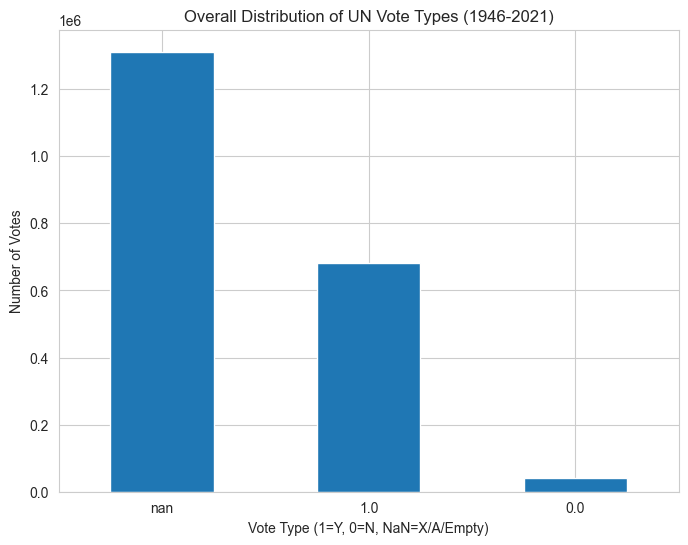

In [29]:
# --- Analyze the overall distribution of vote types ---
# This requires looking at ALL the columns that contain individual country votes.
# This code assumes `country_vote_cols` was successfully defined in Step 2.

if 'country_vote_cols' in locals() and len(country_vote_cols) > 0:

    print("\nAnalyzing Distribution of Vote Types across all vote columns:")

    # Stack the vote columns to count all vote types together
    # .stack() automatically drops NaNs by default, but we want to include them
    # So we'll use value_counts(dropna=False) on the original columns before stacking/melting
    # or stack and then count NaNs separately. Let's use melting for clarity.

    # Melt the DataFrame to long format for easier counting
    df_melted_votes = df.melt(value_vars=country_vote_cols, var_name='Country', value_name='Vote')

    # Count the occurrences of each vote type (1.0, 0.0, NaN)
    vote_counts = df_melted_votes['Vote'].value_counts(dropna=False) # dropna=False includes NaN count

    print("\nOverall Distribution of Vote Types (1.0=Yes, 0.0=No, NaN=X/A/Empty):")
    print(vote_counts)

    # Calculate percentages
    vote_percentages = vote_counts / vote_counts.sum() * 100
    print("\nOverall Percentage Distribution of Vote Types:")
    print(vote_percentages)

    # Optional: Visualize the vote distribution
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))
    # Use seaborn for potentially better handling of categorical data including NaN if plotted differently
    # For a simple bar plot of counts including NaN:
    vote_counts.plot(kind='bar')

    plt.title('Overall Distribution of UN Vote Types (1946-2021)')
    plt.xlabel('Vote Type (1=Y, 0=N, NaN=X/A/Empty)')
    plt.ylabel('Number of Votes')
    plt.xticks(rotation=0)
    plt.show()

else:
    print("\nWarning: `country_vote_cols` variable not defined or is empty. Cannot analyze vote distribution.")
    print("Please ensure `country_vote_cols` was correctly identified and defined in Step 2.")

In [30]:
import pandas as pd
import numpy as np

# --- Step 4: Quantifying Country Relationships ---
# This step calculates the agreement matrix between countries based on their votes.
# It assumes:
# 1. Data is loaded into DataFrame 'df' (Step 1 successful)
# 2. Country vote columns are correctly identified in `country_vote_cols` (Step 2 successful)
# 3. Votes in country_vote_cols are mapped to 1.0 (Yes), 0.0 (No), and NaN (Others) (Step 2 successful)

if 'country_vote_cols' in locals() and len(country_vote_cols) > 0 and df is not None:

    print("\nCalculating country agreement matrix...")

    # Select only the columns containing country votes
    # The data types should be float64 after cleaning in Step 2
    vote_df = df[country_vote_cols]

    # Initialize an empty agreement matrix
    # The index and columns will be the country names (from country_vote_cols)
    agreement_matrix = pd.DataFrame(index=country_vote_cols, columns=country_vote_cols, dtype=float)

    # Calculate agreement for each pair of countries
    # This loop can be computationally intensive for many countries
    num_countries = len(country_vote_cols)
    print(f"Calculating agreement for {num_countries} countries ({num_countries * (num_countries - 1) // 2} pairs)... This may take some time.")


    for i in range(num_countries):
        country1 = country_vote_cols[i]
        # We only need to calculate the upper triangle of the matrix
        for j in range(i, num_countries):
            country2 = country_vote_cols[j]

            if country1 == country2:
                agreement_matrix.loc[country1, country2] = 100.0 # A country always agrees with itself (100%)
            else:
                # Get votes for the two countries
                # We only compare votes where *both* countries cast a definitive Y (1.0) or N (0.0) vote.
                # .dropna() here will remove rows where EITHER country1 OR country2 is NaN
                comparison_votes = vote_df[[country1, country2]].dropna()

                if len(comparison_votes) > 0:
                    # Count where votes are identical (both 1.0 or both 0.0)
                    agreements = (comparison_votes[country1] == comparison_votes[country2]).sum()

                    # Count where votes are different (one 1.0 and one 0.0)
                    # Note: .dropna() already removed rows where one is NaN, so remaining differences are 1 vs 0
                    disagreements = (comparison_votes[country1] != comparison_votes[country2]).sum()

                    # Total comparable votes = agreements + disagreements
                    total_comparable_votes = agreements + disagreements

                    if total_comparable_votes > 0:
                         # Calculate percentage agreement
                        agreement_percentage = (agreements / total_comparable_votes) * 100
                        agreement_matrix.loc[country1, country2] = agreement_percentage
                        agreement_matrix.loc[country2, country1] = agreement_percentage # Matrix is symmetrical
                    else:
                        # If no resolutions where both countries cast a comparable vote
                        agreement_matrix.loc[country1, country2] = np.nan # Represent no common votes as NaN
                        agreement_matrix.loc[country2, country1] = np.nan


    print("\nAgreement Matrix Calculation Complete.")

    # Display the head of the agreement matrix
    print("\nAgreement Matrix (First 5x5):")
    print(agreement_matrix.head())

    # Optional: Save the agreement matrix to a CSV file for later use or visualization
    # agreement_matrix.to_csv('country_agreement_matrix.csv')
    # print("\nAgreement matrix saved to country_agreement_matrix.csv")


else:
    print("\nERROR: `country_vote_cols` not defined or df not loaded. Cannot calculate agreement matrix.")
    print("Please ensure Step 1 and Step 2 were completed successfully.")


Calculating country agreement matrix...
Calculating agreement for 259 countries (33411 pairs)... This may take some time.

Agreement Matrix Calculation Complete.

Agreement Matrix (First 5x5):
                                       SENEGAL    MALAYSIA  \
SENEGAL                             100.000000   99.400533   
MALAYSIA                             99.400533  100.000000   
VENEZUELA (BOLIVARIAN REPUBLIC OF)   97.023810   97.700348   
UNITED KINGDOM                       64.560682   64.093865   
RUSSIAN FEDERATION                   89.237668   89.215686   

                                    VENEZUELA (BOLIVARIAN REPUBLIC OF)  \
SENEGAL                                                      97.023810   
MALAYSIA                                                     97.700348   
VENEZUELA (BOLIVARIAN REPUBLIC OF)                          100.000000   
UNITED KINGDOM                                               59.200000   
RUSSIAN FEDERATION                                           91

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform # Needed if using distance matrix instead of similarity

# --- Step 5: Identifying Voting Blocs (Clustering) ---
# This step uses the agreement matrix calculated in Step 4 to cluster countries.
# It assumes the `agreement_matrix` DataFrame is available from Step 4.

if 'agreement_matrix' in locals() and not agreement_matrix.empty:

    print("\nStarting country clustering...")

    # --- Prepare Data for Clustering ---
    # Clustering algorithms typically work on *distance* matrices, not similarity (agreement) matrices.
    # A common distance metric is 1 - similarity.
    # Also, clustering usually expects no NaNs. We need a strategy for NaNs in the agreement matrix.
    # Option 1: Impute NaNs (e.g., replace with the mean agreement, or 0 if they had no common votes)
    # Option 2: Use a distance metric that can handle NaNs (more complex, often specific algorithms)
    # Let's use Option 1 for simplicity: replace NaNs with 0 agreement (assuming no common votes means no agreement)
    distance_matrix = 1 - (agreement_matrix / 100.0) # Convert agreement percentage to 0-1 similarity, then to distance
    # Replace NaNs (where there were no comparable votes) with a high distance, e.g., 1 (max possible distance)
    distance_matrix.fillna(1.0, inplace=True)

    # Ensure the diagonal is 0 distance (country with itself) - should be if agreement was 100
    np.fill_diagonal(distance_matrix.values, 0)

    # For scipy linkage, convert the square distance matrix to a condensed format
    condensed_distance_matrix = squareform(distance_matrix)

    # --- Perform Hierarchical Clustering ---
    # 'ward' is a common linkage method that minimizes the variance of the clusters being merged.
    print("Performing hierarchical clustering...")
    linked = linkage(condensed_distance_matrix, 'ward')
    print("Clustering complete.")

    # --- Visualize the Clustering (Dendrogram) ---
    print("\nGenerating dendrogram (this may take time for many countries)...")
    plt.figure(figsize=(20, 10)) # Adjust figure size as needed for readability
    dendrogram(linked,
               orientation='top',
               labels=agreement_matrix.index.tolist(), # Use country names as labels
               distance_sort='descending',
               show_leaf_counts=True) # Show how many items in each leaf group

    plt.title('Hierarchical Clustering Dendrogram of UN Voting Agreement')
    plt.xlabel('Countries')
    plt.ylabel('Distance (1 - Agreement)')
    # You might need to zoom in on specific parts of the plot or adjust figsize for readability

    # Optional: Save the dendrogram image
    # plt.savefig('un_voting_dendrogram.png', dpi=300, bbox_inches='tight')
    # print("Dendrogram saved as un_voting_dendrogram.png")

    plt.show()

    # --- Optional: Extract Clusters ---
    # You can cut the dendrogram at a certain distance or to get a specific number of clusters.
    # To get a specific number of clusters (e.g., 5 clusters):
    # num_clusters = 5
    # clusters = fcluster(linked, num_clusters, criterion='maxclust')
    # df_clusters = pd.DataFrame({'Country': agreement_matrix.index, 'Cluster': clusters})
    # print(f"\nFirst 10 countries and their assigned cluster (for {num_clusters} clusters):")
    # print(df_clusters.head(10))
    # print("\nCluster size distribution:")
    # print(df_clusters['Cluster'].value_counts())


else:
    print("\nERROR: Agreement matrix not found or is empty. Cannot perform clustering.")
    print("Please ensure Step 4 was completed successfully.")

ModuleNotFoundError: No module named 'scipy'

In [32]:
# --- See Agreement of a Specific Country (e.g., India) ---
# Replace 'INDIA' with the exact column name for India in your DataFrame
country_of_interest = 'INDIA' # <-- REPLACE if the name is different

if country_of_interest in agreement_matrix.index:
    print(f"\nAgreement percentages for {country_of_interest} with all other countries:")
    # Select the row for the country of interest
    india_agreement = agreement_matrix.loc[country_of_interest].sort_values(ascending=False)

    # Print the agreements, excluding 100% with itself
    print(india_agreement[india_agreement < 100.0])

    # Optional: Print the countries with the lowest agreement with India
    # print(india_agreement.sort_values(ascending=True).head(10))

else:
    print(f"\nWarning: '{country_of_interest}' not found in the agreement matrix.")
    print("Please check the exact spelling of the country name in your data.")


Agreement percentages for INDIA with all other countries:
BURMA                          99.249812
SURINAM                        99.159664
CEYLON                         99.082569
BHUTAN                         99.037404
UNITED REPUBLIC OF CAMEROON    98.341232
                                 ...    
PALAU                          41.183036
ISRAEL                         35.766423
UNITED STATES                  32.592025
 CHILE                          0.000000
 BELGIUM                        0.000000
Name: INDIA, Length: 237, dtype: float64


In [33]:

# --- Save the full agreement matrix to a CSV file ---
if 'agreement_matrix' in locals() and not agreement_matrix.empty:
    file_path = 'country_agreement_matrix.csv'
    agreement_matrix.to_csv(file_path)
    print(f"\nFull agreement matrix saved to {file_path}")
else:
    print("\nWarning: Agreement matrix not found. Cannot save to file.")
    


Full agreement matrix saved to country_agreement_matrix.csv



Generating heatmap of the agreement matrix...


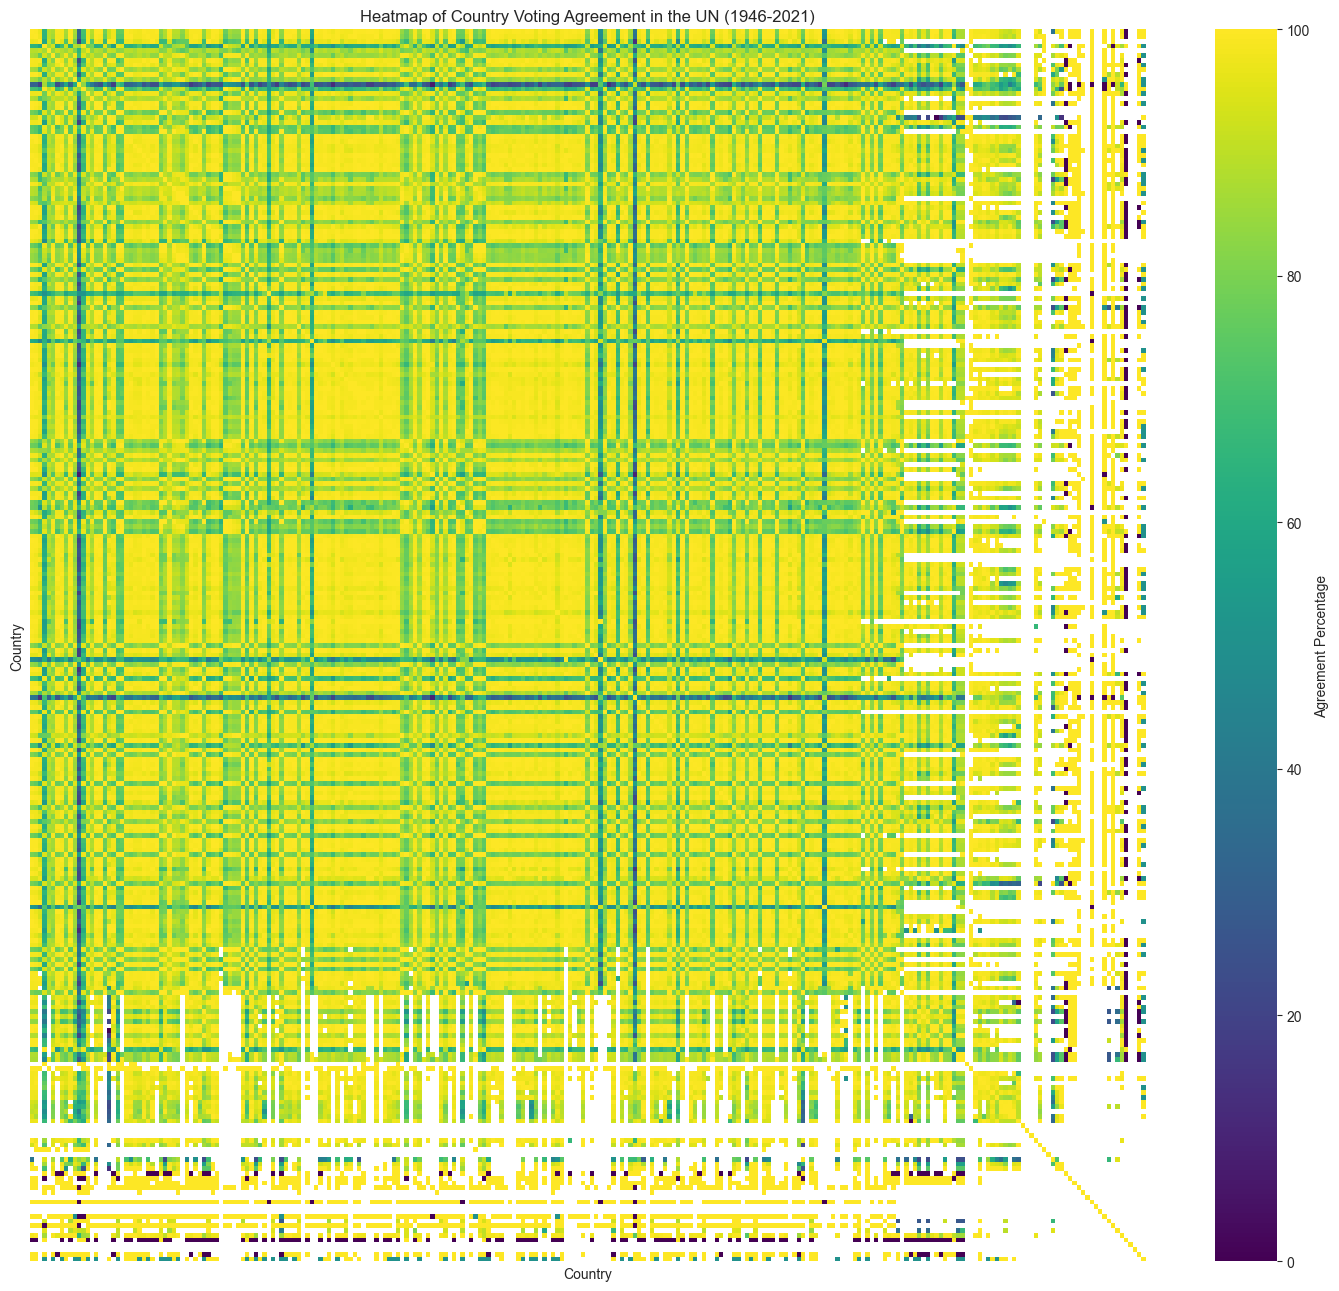

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Visualize the full agreement matrix as a Heatmap ---
if 'agreement_matrix' in locals() and not agreement_matrix.empty:

    print("\nGenerating heatmap of the agreement matrix...")

    plt.figure(figsize=(18, 16)) # Adjust figure size as needed

    # Use seaborn heatmap. Set annot=False for readability with many countries.
    # cmap='viridis' or 'plasma' or 'coolwarm' are good color maps for agreement/distance.
    sns.heatmap(agreement_matrix, cmap='viridis', annot=False, cbar_kws={'label': 'Agreement Percentage'})

    plt.title('Heatmap of Country Voting Agreement in the UN (1946-2021)')
    plt.xlabel('Country')
    plt.ylabel('Country')
    # The ticks and labels will be unreadable for 259 countries, but the color patterns will show the structure.
    plt.xticks([]) # Hide x-axis labels for clarity with many countries
    plt.yticks([]) # Hide y-axis labels for clarity with many countries


    # Optional: Save the heatmap image
    # plt.savefig('un_voting_agreement_heatmap_full.png', dpi=300, bbox_inches='tight')
    # print("Full heatmap saved as un_voting_agreement_heatmap_full.png")

    plt.show()

else:
    print("\nWarning: Agreement matrix not found. Cannot generate heatmap.")


All 11 countries found in the agreement matrix.

Generating heatmap for the selected countries...


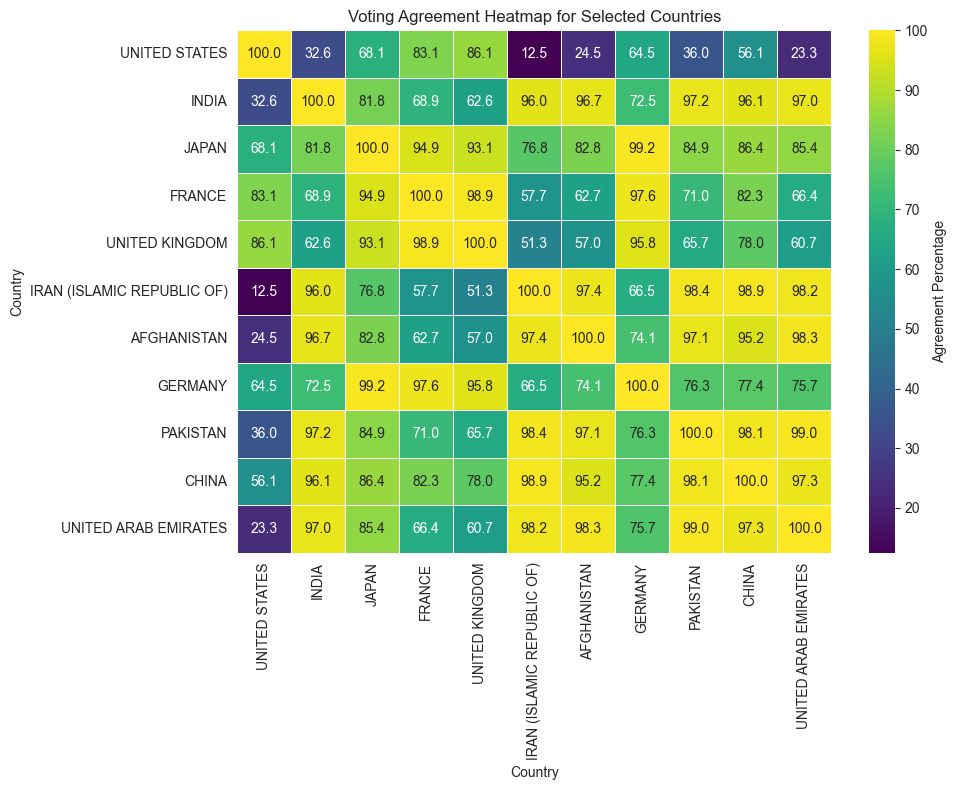

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 6: Visualize Relationships (Subset Heatmap) ---
# This step generates a heatmap for a specific set of countries from the agreement matrix.
# It assumes the `agreement_matrix` DataFrame is available from Step 4.

if 'agreement_matrix' in locals() and not agreement_matrix.empty:

    # --- Define the list of countries for the heatmap ---
    # You MUST check these names against your actual agreement_matrix.index.tolist()
    # and correct them if the spelling/capitalization is different.
    countries_of_interest = [
        'UNITED STATES',         # Check actual name
        'INDIA',                 # Check actual name
        'JAPAN',                 # Check actual name
        'FRANCE',                # Check actual name
        'UNITED KINGDOM',        # Check actual name (Previous output showed 'UNITED KINGDOM')
        'IRAN (ISLAMIC REPUBLIC OF)', # Check actual name (Might just be 'IRAN')
        'AFGHANISTAN',           # Check actual name
        'GERMANY',               # Check actual name
        'PAKISTAN',              # Check actual name
        'CHINA',                 # Check actual name (Previous output might imply just 'CHINA')
        'UNITED ARAB EMIRATES'   # Check actual name (Might be 'UAE' or similar)
    ]

    # --- Filter the agreement matrix for only these countries ---
    # First, check if all requested countries are in the matrix
    missing_countries = [country for country in countries_of_interest if country not in agreement_matrix.index]

    if missing_countries:
        print(f"\nWarning: The following countries were not found in the agreement matrix: {missing_countries}")
        print("Please check the spelling/names against your agreement_matrix.index.tolist().")
        # Remove missing countries from the list so we can plot the rest
        countries_present = [country for country in countries_of_interest if country in agreement_matrix.index]
        if not countries_present:
             print("\nNo countries found from the list in the agreement matrix. Cannot generate heatmap.")
        else:
             print(f"Generating heatmap for the {len(countries_present)} countries found.")
             subset_matrix = agreement_matrix.loc[countries_present, countries_present]

    else:
        print(f"\nAll {len(countries_of_interest)} countries found in the agreement matrix.")
        subset_matrix = agreement_matrix.loc[countries_of_interest, countries_of_interest]


    # --- Generate the heatmap for the subset matrix ---
    if 'subset_matrix' in locals() and not subset_matrix.empty:
        print("\nGenerating heatmap for the selected countries...")

        plt.figure(figsize=(10, 8)) # Adjust figure size as needed for this number of countries

        # Use seaborn heatmap with annotations (show the numbers)
        sns.heatmap(subset_matrix,
                    annot=True,      # Show agreement percentages on the heatmap
                    cmap='viridis',  # Color map
                    fmt=".1f",       # Format numbers to one decimal place
                    linewidths=.5,   # Add lines between cells
                    cbar_kws={'label': 'Agreement Percentage'}) # Label the color bar

        plt.title('Voting Agreement Heatmap for Selected Countries')
        plt.xlabel('Country')
        plt.ylabel('Country')
        plt.xticks(rotation=90) # Rotate labels for better readability
        plt.yticks(rotation=0)

        plt.tight_layout() # Adjust layout to prevent labels overlapping

        # Optional: Save the heatmap image
        # plt.savefig('selected_countries_agreement_heatmap.png', dpi=300)
        # print("Heatmap saved as selected_countries_agreement_heatmap.png")

        plt.show()

    else:
        print("\nCould not create subset matrix for heatmap.")


else:
    print("\nERROR: Agreement matrix not found or is empty. Cannot generate subset heatmap.")
    print("Please ensure Step 4 was completed successfully.")

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step C: Generate Heatmap for Selected Countries (GA Only) ---
# This step generates a heatmap from the General Assembly agreement matrix.
# It assumes the `agreement_matrix_ga` DataFrame is available from Step B.

if 'agreement_matrix_ga' in locals() and agreement_matrix_ga is not None and not agreement_matrix_ga.empty:

    print("\nGenerating heatmap for the selected countries (General Assembly only)...")

    # --- Define the list of countries for the heatmap ---
    # You MUST check these names against your actual agreement_matrix_ga.index.tolist()
    # and correct them if the spelling/capitalization is different.
    countries_of_interest_ga = [
        'UNITED STATES',         # Check actual name
        'INDIA',                 # Check actual name
        'JAPAN',                 # Check actual name
        'FRANCE',                # Check actual name
        'UNITED KINGDOM',        # Check actual name
        'IRAN (ISLAMIC REPUBLIC OF)', # Check actual name
        'AFGHANISTAN',           # Check actual name
        'GERMANY',               # Check actual name
        'PAKISTAN',              # Check actual name
        'CHINA',                 # Check actual name
        'UNITED ARAB EMIRATES',   # Check actual name
        'ISRAEL',                # Check actual name
        'RUSSIAN FEDERATION'     # Check actual name for Russia
    ]

    # --- Filter the GA agreement matrix for only these countries ---
    # First, check if all requested countries are in the matrix
    missing_countries_ga = [country for country in countries_of_interest_ga if country not in agreement_matrix_ga.index]

    if missing_countries_ga:
        print(f"\nWarning: The following countries were not found in the GA agreement matrix: {missing_countries_ga}")
        print("Please check the spelling/names against your agreement_matrix_ga.index.tolist().")
        # Remove missing countries from the list so we can plot the rest
        countries_present_ga = [country for country in countries_of_interest_ga if country in agreement_matrix_ga.index]
        if not countries_present_ga:
             print("\nNo countries found from the list in the GA agreement matrix. Cannot generate heatmap.")
        else:
             print(f"Generating heatmap for the {len(countries_present_ga)} countries found in GA data.")
             subset_matrix_ga = agreement_matrix_ga.loc[countries_present_ga, countries_present_ga]

    else:
        print(f"\nAll {len(countries_of_interest_ga)} countries found in the GA agreement matrix.")
        subset_matrix_ga = agreement_matrix_ga.loc[countries_of_interest_ga, countries_of_interest_ga]


    # --- Generate the heatmap for the subset matrix (GA Only) ---
    if 'subset_matrix_ga' in locals() and not subset_matrix_ga.empty:
        print("\nGenerating heatmap for the selected countries (General Assembly only)...")

        # Adjust figure size based on the number of countries (13 in this case)
        plt.figure(figsize=(11, 9)) # Slightly larger figure

        sns.heatmap(subset_matrix_ga,
                    annot=True,      # Show agreement percentages on the heatmap
                    cmap='viridis',  # Color map
                    fmt=".1f",       # Format numbers to one decimal place
                    linewidths=.5,   # Add lines between cells
                    cbar_kws={'label': 'Agreement Percentage (GA Only)'}) # Label the color bar

        plt.title('Voting Agreement Heatmap for Selected Countries (General Assembly Only)')
        plt.xlabel('Country')
        plt.ylabel('Country')
        plt.xticks(rotation=90) # Rotate labels for better readability
        plt.yticks(rotation=0)

        plt.tight_layout() # Adjust layout to prevent labels overlapping

        # Optional: Save the heatmap image
        # plt.savefig('selected_countries_agreement_heatmap_GA.png', dpi=300)
        # print("GA Heatmap saved as selected_countries_agreement_heatmap_GA.png")

        plt.show()

    else:
        print("\nCould not create subset matrix for GA heatmap.")


else:
    print("\nERROR: General Assembly agreement matrix not found or is empty. Cannot generate heatmap.")
    print("Please ensure Step A and Step B were completed successfully before running Step C.")


ERROR: General Assembly agreement matrix not found or is empty. Cannot generate heatmap.
Please ensure Step A and Step B were completed successfully before running Step C.


In [37]:
# Step A: Filter Data for General Assembly Resolutions

# Check if the main data (df) is ready
if 'df' in locals() and df is not None and 'Council' in df.columns:
    print("Step A: Getting General Assembly votes...")

    # Make a new list of answers called df_ga with only GA rows
    df_ga = df[df['Council'] == 'General Assembly'].copy()

    print(f"Found {len(df_ga)} General Assembly votes.")

    if df_ga.empty:
        print("Step A Warning: No General Assembly votes found.")
    # Optional: print a little bit of the new list to see
    # print(df_ga.head())

else:
    print("Step A ERROR: Cannot get GA votes. Make sure Step 1 loaded the data.")
    df_ga = None # Keep df_ga empty if there's an error

Step A: Getting General Assembly votes...
Found 5238 General Assembly votes.


In [38]:
# Step B: Calculate Agreement Matrix for General Assembly Only

# Check if the list of country columns and the GA votes are ready
if 'country_vote_cols' in locals() and len(country_vote_cols) > 0 and 'df_ga' in locals() and df_ga is not None and not df_ga.empty:

    print("\nStep B: Figuring out agreement for GA votes...")

    # Use only the country columns from the GA votes list
    vote_df_ga = df_ga[country_vote_cols]

    # Make an empty box (DataFrame) to store the agreement numbers
    agreement_matrix_ga = pd.DataFrame(index=country_vote_cols, columns=country_vote_cols, dtype=float)

    num_countries = len(country_vote_cols)
    print(f"Calculating agreement for {num_countries} countries using GA votes...")

    # This part takes time - the computer is comparing every country to every other country
    # print("This might take a little while...")

    # Loop through each pair of countries (simplified logic description)
    for i in range(num_countries):
        country1 = country_vote_cols[i]
        for j in range(i, num_countries): # Only need half the pairs
            country2 = country_vote_cols[j]

            if country1 == country2:
                agreement_matrix_ga.loc[country1, country2] = 100.0 # A country agrees 100% with itself
            else:
                # Look at votes only where BOTH countries voted Yes (1) or No (0) in GA
                comparison_votes_ga = vote_df_ga[[country1, country2]].dropna()

                if len(comparison_votes_ga) > 0:
                    # Count how many times their votes were the same (both 1 or both 0)
                    agreements_ga = (comparison_votes_ga[country1] == comparison_votes_ga[country2]).sum()
                    # Calculate the percentage
                    agreement_percentage_ga = (agreements_ga / len(comparison_votes_ga)) * 100
                    agreement_matrix_ga.loc[country1, country2] = agreement_percentage_ga
                    agreement_matrix_ga.loc[country2, country1] = agreement_percentage_ga # Fill the other side too
                else:
                    # If they never both voted Yes/No in GA
                    agreement_matrix_ga.loc[country1, country2] = np.nan # Show not available
                    agreement_matrix_ga.loc[country2, country1] = np.nan


    print("Step B: GA Agreement Calculation Complete.")

    # Optional: show the first few numbers in the agreement box
    # print("\nFirst few agreement numbers:")
    # print(agreement_matrix_ga.head())


else:
    print("Step B ERROR: Cannot calculate agreement. Make sure Step 2 found country columns AND Step A found GA votes.")
    agreement_matrix_ga = None # Keep empty if error


Step B: Figuring out agreement for GA votes...
Calculating agreement for 259 countries using GA votes...
Step B: GA Agreement Calculation Complete.



Step C: Drawing heatmap...

All 13 countries were found.

Drawing the picture...


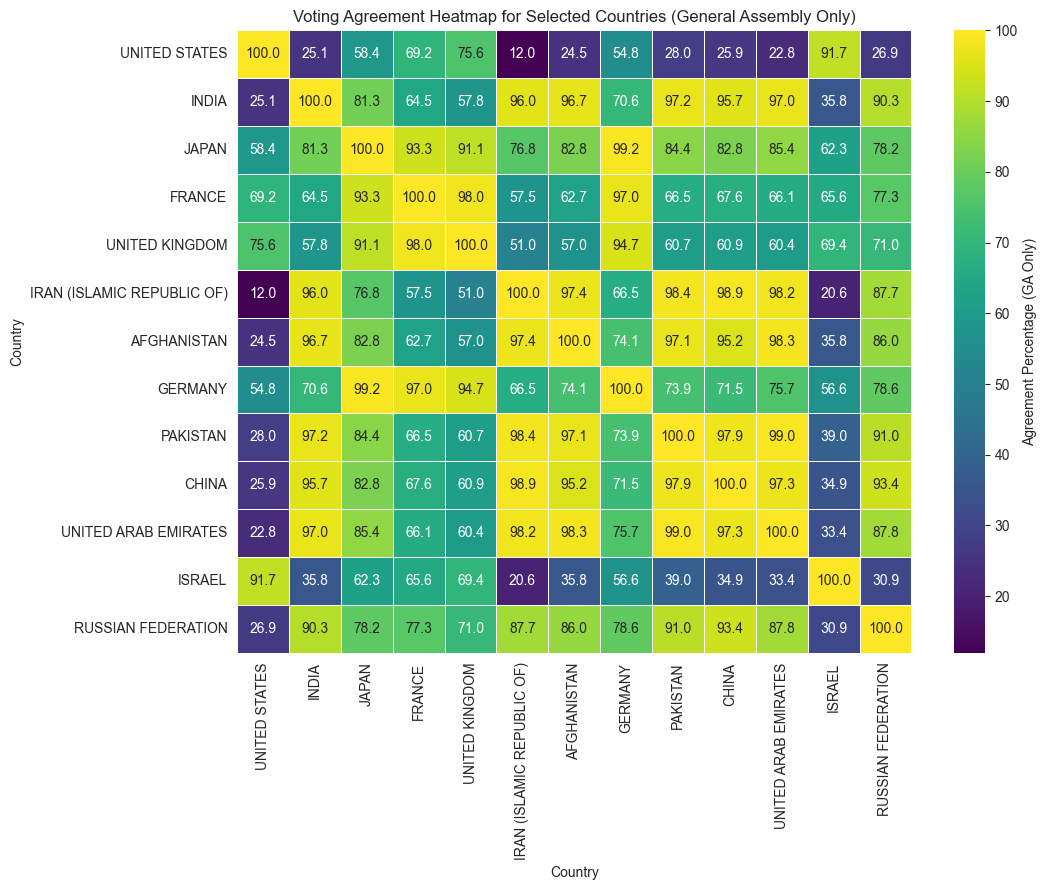

In [39]:
# Step C: Generate Heatmap for Selected Countries (GA Only)

import seaborn as sns
import matplotlib.pyplot as plt

# Check if the GA agreement numbers are ready
if 'agreement_matrix_ga' in locals() and agreement_matrix_ga is not None and not agreement_matrix_ga.empty:

    print("\nStep C: Drawing heatmap...")

    # --- List the countries you want to see in the picture ---
    # YOU MUST CHECK THE SPELLING AND CAPITALIZATION OF THESE NAMES
    # against the country names in your data! They need to match exactly.
    # You can see the names by looking at the top row/first column of the numbers you saw in Step B.
    countries_to_show_on_heatmap = [
        'UNITED STATES',         # Check this name!
        'INDIA',                 # Check this name!
        'JAPAN',                 # Check this name!
        'FRANCE',                # Check this name!
        'UNITED KINGDOM',        # Check this name!
        'IRAN (ISLAMIC REPUBLIC OF)', # Check this name! (Maybe just 'IRAN'?)
        'AFGHANISTAN',           # Check this name!
        'GERMANY',               # Check this name!
        'PAKISTAN',              # Check this name!
        'CHINA',                 # Check this name!
        'UNITED ARAB EMIRATES',   # Check this name! (Maybe 'UAE'?)
        'ISRAEL',                # Check this name!
        'RUSSIAN FEDERATION'     # Check this name! (Maybe just 'RUSSIA'?)
    ]

    # --- Get the agreement numbers ONLY for these countries ---
    # Check if all the names in your list exist in the agreement numbers from Step B
    countries_found = [country for country in countries_to_show_on_heatmap if country in agreement_matrix_ga.index]
    countries_not_found = [country for country in countries_to_show_on_heatmap if country not in agreement_matrix_ga.index]

    if countries_not_found:
        print(f"\nStep C Warning: Could NOT find these countries in the data: {countries_not_found}")
        print("Please check the spelling/names in the list above against the names from Step B output.")
        # Only make the picture for the countries that were found
        if not countries_found:
            print("Step C ERROR: No countries found to make a heatmap.")
            subset_matrix_ga = None # Make sure the subset is empty
        else:
             print(f"Making heatmap for the {len(countries_found)} countries found.")
             # Get the numbers for only the countries found
             subset_matrix_ga = agreement_matrix_ga.loc[countries_found, countries_found]

    else:
        print(f"\nAll {len(countries_to_show_on_heatmap)} countries were found.")
        # Get the numbers for only the countries in your list
        subset_matrix_ga = agreement_matrix_ga.loc[countries_to_show_on_heatmap, countries_to_show_on_heatmap]


    # --- Draw the heatmap picture ---
    if 'subset_matrix_ga' in locals() and subset_matrix_ga is not None and not subset_matrix_ga.empty:
        print("\nDrawing the picture...")

        # Make the picture box size
        plt.figure(figsize=(11, 9))

        # Tell seaborn to draw the heatmap
        sns.heatmap(subset_matrix_ga,
                    annot=True,      # Put the agreement number on each square
                    cmap='viridis',  # Use a color style (viridis)
                    fmt=".1f",       # Show numbers with 1 decimal place
                    linewidths=.5,   # Draw lines between the squares
                    cbar_kws={'label': 'Agreement Percentage (GA Only)'}) # Label the color bar

        # Add title and labels
        plt.title('Voting Agreement Heatmap for Selected Countries (General Assembly Only)')
        plt.xlabel('Country')
        plt.ylabel('Country')
        plt.xticks(rotation=90) # Turn text sideways so it's easier to read
        plt.yticks(rotation=0)

        plt.tight_layout() # Make the picture look nice

        # Show the picture
        plt.show()

    else:
        print("\nStep C ERROR: Could not draw the heatmap.")


else:
    print("\nStep C ERROR: Agreement numbers not ready. Make sure Step A and Step B ran successfully.")

In [40]:
import pandas as pd

# --- Step A (SC Version): Filter Data for Security Council Resolutions ---
# Assumes 'df' DataFrame is loaded from Step 1 and 'Council' column exists.

if 'df' in locals() and df is not None and 'Council' in df.columns:
    print("\nStep A (SC): Filtering data for Security Council resolutions...")

    # Create a new DataFrame with only SC resolutions
    df_sc = df[df['Council'] == 'Security Council'].copy()

    print(f"Original number of resolutions: {len(df)}")
    print(f"Number of Security Council resolutions: {len(df_sc)}")

    if df_sc.empty:
        print("\nStep A (SC) Warning: No Security Council resolutions found after filtering.")
    else:
        print("\nFiltered data head (Security Council only):")
        # Display only relevant columns for the head check
        # Need country_vote_cols from original Step 2
        cols_to_display_sc_head = [col for col in ['Council', 'Date', 'Title', 'TOTAL VOTES'] if col in df_sc.columns]
        if 'country_vote_cols' in locals() and country_vote_cols:
             cols_to_display_sc_head.extend([col for col in country_vote_cols[:5] if col in df_sc.columns]) # Add first 5 vote cols if available
        print(df_sc[cols_to_display_sc_head].head())


else:
    print("\nStep A (SC) ERROR: DataFrame not loaded or 'Council' column missing. Cannot filter.")
    df_sc = None # Ensure df_sc is None if filtering fails


Step A (SC): Filtering data for Security Council resolutions...
Original number of resolutions: 7855
Number of Security Council resolutions: 2617

Filtered data head (Security Council only):
            Council        Date  \
0  Security Council  2016-12-13   
1  Security Council  2020-06-22   
2  Security Council  2016-12-14   
3  Security Council  2016-12-12   
4  Security Council  2005-09-23   

                                               Title  TOTAL VOTES  SENEGAL  \
0  Security Council resolution 2323 (2016) [on ex...           15      1.0   
1  Security Council resolution 2527 (2020) [on ex...           15      NaN   
2  Security Council resolution 2324 (2016) [on Se...           15      1.0   
3  Security Council resolution 2322 (2016) [on in...           15      1.0   
4  Security Council resolution 1627 (2005) [on ex...           15      NaN   

   MALAYSIA  VENEZUELA (BOLIVARIAN REPUBLIC OF)  UNITED KINGDOM  \
0       1.0                                 1.0             1

In [41]:
import pandas as pd
import numpy as np

# --- Step B (SC Version): Recalculate Agreement Matrix for Security Council Only ---
# This step calculates the agreement matrix using only the SC data.
# It assumes:
# 1. df_sc DataFrame is created from Step A (SC Version) and is not empty.
# 2. Country vote columns are correctly identified in `country_vote_cols` (from original Step 2)
# 3. Votes in country_vote_cols in the original df (and thus df_sc) are mapped to 1.0, 0.0, NaN (from original Step 2).

agreement_matrix_sc = None # Initialize the variable

# Ensure country_vote_cols is defined from your successful original Step 2 run
if 'country_vote_cols' not in locals() or not country_vote_cols or df is None:
     print("\nStep B (SC) ERROR: `country_vote_cols` variable not defined or df not loaded. Please run original Step 1 and Step 2 first.")

elif df_sc is None or df_sc.empty:
     print("\nStep B (SC) ERROR: df_sc DataFrame not found or is empty. Please run Step A (SC Version) first.")

else:
    print("\nStep B (SC): Calculating Security Council country agreement matrix...")

    # Select only the country vote columns from the SC DataFrame
    # These should be float64 after cleaning in original Step 2
    # Ensure we only try to select columns that actually exist in df_sc
    vote_df_sc = df_sc[[col for col in country_vote_cols if col in df_sc.columns]] # Added check if col exists


    # Initialize an empty agreement matrix for SC votes
    agreement_matrix_sc = pd.DataFrame(index=vote_df_sc.columns, columns=vote_df_sc.columns, dtype=float) # Use columns from vote_df_sc

    # Calculate agreement for each pair of countries using SC votes
    num_countries_in_sc_data = len(vote_df_sc.columns)
    num_sc_resolutions = len(df_sc)
    print(f"Calculating agreement for {num_countries_in_sc_data} countries based on {num_sc_resolutions} SC resolutions...")


    # This loop can be computationally intensive, but less so for only SC data
    # A more optimized approach exists but this is clearer for demonstration
    country_list_sc = vote_df_sc.columns.tolist()
    for i in range(num_countries_in_sc_data):
        country1 = country_list_sc[i]
        for j in range(i, num_countries_in_sc_data):
            country2 = country_list_sc[j]

            if country1 == country2:
                agreement_matrix_sc.loc[country1, country2] = 100.0
            else:
                # Get votes for the two countries from the SC data, dropping NaNs
                comparison_votes_sc = vote_df_sc[[country1, country2]].dropna()

                if len(comparison_votes_sc) > 0:
                    agreements_sc = (comparison_votes_sc[country1] == comparison_votes_sc[country2]).sum()
                    total_comparable_votes_sc = len(comparison_votes_sc) # agreements + disagreements

                    if total_comparable_votes_sc > 0:
                        agreement_percentage_sc = (agreements_sc / total_comparable_votes_sc) * 100
                        agreement_matrix_sc.loc[country1, country2] = agreement_percentage_sc
                        agreement_matrix_sc.loc[country2, country1] = agreement_percentage_sc
                    else:
                        agreement_matrix_sc.loc[country1, country2] = np.nan
                        agreement_matrix_sc.loc[country2, country1] = np.nan
                else:
                    agreement_matrix_sc.loc[country1, country2] = np.nan
                    agreement_matrix_sc.loc[country2, country1] = np.nan


    print("\nStep B (SC): Security Council Agreement Matrix Calculation Complete.")

    # Display the head of the new SC agreement matrix
    print("\nSecurity Council Agreement Matrix (First 5x5):")
    print(agreement_matrix_sc.head())


Step B (SC): Calculating Security Council country agreement matrix...
Calculating agreement for 259 countries based on 2617 SC resolutions...

Step B (SC): Security Council Agreement Matrix Calculation Complete.

Security Council Agreement Matrix (First 5x5):
                                       SENEGAL    MALAYSIA  \
SENEGAL                             100.000000  100.000000   
MALAYSIA                            100.000000  100.000000   
VENEZUELA (BOLIVARIAN REPUBLIC OF)   98.611111   99.236641   
UNITED KINGDOM                      100.000000  100.000000   
RUSSIAN FEDERATION                  100.000000  100.000000   

                                    VENEZUELA (BOLIVARIAN REPUBLIC OF)  \
SENEGAL                                                      98.611111   
MALAYSIA                                                     99.236641   
VENEZUELA (BOLIVARIAN REPUBLIC OF)                          100.000000   
UNITED KINGDOM                                               99.230769


Step C (SC): Drawing heatmap for permanent SC members...

All 5 permanent SC members found.

Drawing the heatmap...


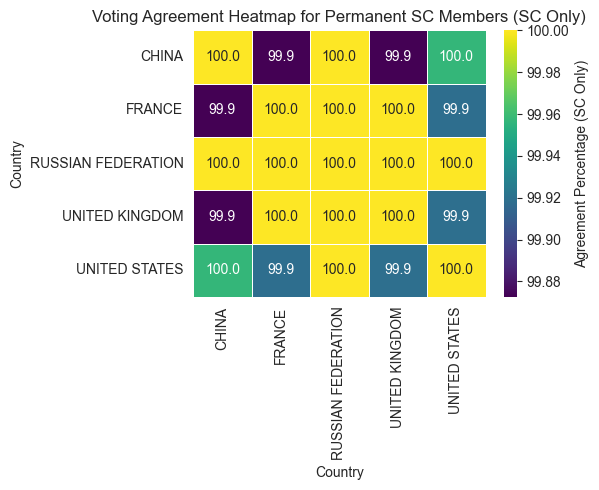

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step C (SC Version): Generate Heatmap for Permanent SC Members ---
# This step generates a heatmap from the Security Council agreement matrix.
# It assumes the `agreement_matrix_sc` DataFrame is available from Step B (SC Version) and is not empty.

if 'agreement_matrix_sc' in locals() and agreement_matrix_sc is not None and not agreement_matrix_sc.empty:

    print("\nStep C (SC): Drawing heatmap for permanent SC members...")

    # --- Define the list of the 5 permanent SC members ---
    # You MUST check these names against the column names in your agreement_matrix_sc.
    # Use agreement_matrix_sc.index.tolist() to see the exact names.
    permanent_sc_members = [
        'CHINA',                 # Check actual name
        'FRANCE',                # Check actual name
        'RUSSIAN FEDERATION',     # Check actual name
        'UNITED KINGDOM',        # Check actual name
        'UNITED STATES'          # Check actual name (Might be 'UNITED STATES OF AMERICA')
    ]

    # --- Filter the SC agreement matrix for only these 5 countries ---
    # First, check if all requested countries are in the matrix
    missing_sc_members = [country for country in permanent_sc_members if country not in agreement_matrix_sc.index]

    if missing_sc_members:
        print(f"\nStep C (SC) Warning: The following permanent SC members were not found in the SC agreement matrix: {missing_sc_members}")
        print("Please check the spelling/names against your agreement_matrix_sc.index.tolist().")
        # Remove missing members from the list so we can plot the rest
        members_present_sc = [country for country in permanent_sc_members if country in agreement_matrix_sc.index]
        if not members_present_sc:
             print("\nStep C (SC) ERROR: No permanent SC members found in the data. Cannot generate heatmap.")
             subset_matrix_sc = None
        else:
             print(f"Making heatmap for the {len(members_present_sc)} permanent SC members found.")
             subset_matrix_sc = agreement_matrix_sc.loc[members_present_sc, members_present_sc]

    else:
        print(f"\nAll 5 permanent SC members found.")
        subset_matrix_sc = agreement_matrix_sc.loc[permanent_sc_members, permanent_sc_members]


    # --- Generate the heatmap for the subset matrix (SC Only) ---
    if 'subset_matrix_sc' in locals() and subset_matrix_sc is not None and not subset_matrix_sc.empty:
        print("\nDrawing the heatmap...")

        # Adjust figure size for 5 countries
        plt.figure(figsize=(6, 5))

        sns.heatmap(subset_matrix_sc,
                    annot=True,      # Show agreement percentages
                    cmap='viridis',  # Color map
                    fmt=".1f",       # Format numbers
                    linewidths=.5,   # Lines between cells
                    cbar_kws={'label': 'Agreement Percentage (SC Only)'}) # Label color bar

        plt.title('Voting Agreement Heatmap for Permanent SC Members (SC Only)')
        plt.xlabel('Country')
        plt.ylabel('Country')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)

        plt.tight_layout()

        # Optional: Save the heatmap image
        # plt.savefig('permanent_sc_members_agreement_heatmap_SC.png', dpi=300)
        # print("SC Heatmap saved as permanent_sc_members_agreement_heatmap_SC.png")

        plt.show()

    else:
        print("\nStep C (SC) ERROR: Could not create subset matrix for SC heatmap.")


else:
    print("\nStep C (SC) ERROR: Security Council agreement matrix not ready. Make sure Step A (SC) and Step B (SC) ran successfully.")

In [43]:
import pandas as pd

# --- Step A: Filter Data for General Assembly Resolutions ---
# Assumes 'df' DataFrame is loaded from original Step 1 and 'Council' column exists.

if 'df' in locals() and df is not None and 'Council' in df.columns:
    print("\nStep A: Getting General Assembly votes...")
    df_ga = df[df['Council'] == 'General Assembly'].copy()
    print(f"Original number of resolutions: {len(df)}")
    print(f"Found {len(df_ga)} General Assembly votes.")
    if df_ga.empty:
        print("Step A Warning: No General Assembly votes found.")
else:
    print("Step A ERROR: Cannot get GA votes. Make sure Step 1 loaded the data.")
    df_ga = None # Keep df_ga empty if there's an error


Step A: Getting General Assembly votes...
Original number of resolutions: 7855
Found 5238 General Assembly votes.


In [44]:
import pandas as pd
import numpy as np

# --- Step B: Recalculate Agreement Matrix for General Assembly Only ---
# This step calculates the agreement matrix using only the GA data.
# It assumes: df_ga is ready, country_vote_cols is defined, votes are cleaned.

agreement_matrix_ga = None # Initialize the variable

if 'country_vote_cols' not in locals() or not country_vote_cols or df is None:
     print("\nStep B ERROR: `country_vote_cols` not defined or df not loaded. Please run Step 1 and original Step 2 first.")
elif 'df_ga' not in locals() or df_ga is None or df_ga.empty:
     print("\nStep B ERROR: df_ga DataFrame not found or is empty. Please run Step A first.")
else:
    print("\nStep B: Calculating General Assembly country agreement matrix...")
    vote_df_ga = df_ga[[col for col in country_vote_cols if col in df_ga.columns]]

    agreement_matrix_ga = pd.DataFrame(index=vote_df_ga.columns, columns=vote_df_ga.columns, dtype=float)
    country_list_ga = vote_df_ga.columns.tolist()
    num_countries_ga = len(country_list_ga)
    num_ga_resolutions = len(df_ga)
    print(f"Calculating agreement for {num_countries_ga} countries based on {num_ga_resolutions} GA resolutions...")

    for i in range(num_countries_ga):
        country1 = country_list_ga[i]
        for j in range(i, num_countries_ga):
            country2 = country_list_ga[j]
            if country1 == country2:
                agreement_matrix_ga.loc[country1, country2] = 100.0
            else:
                comparison_votes_ga = vote_df_ga[[country1, country2]].dropna()
                if len(comparison_votes_ga) > 0:
                    agreements_ga = (comparison_votes_ga[country1] == comparison_votes_ga[country2]).sum()
                    total_comparable_votes_ga = len(comparison_votes_ga)
                    if total_comparable_votes_ga > 0:
                        agreement_percentage_ga = (agreements_ga / total_comparable_votes_ga) * 100
                        agreement_matrix_ga.loc[country1, country2] = agreement_percentage_ga
                        agreement_matrix_ga.loc[country2, country1] = agreement_percentage_ga
                    else: agreement_matrix_ga.loc[country1, country2] = np.nan
                else: agreement_matrix_ga.loc[country1, country2] = np.nan

    print("Step B: GA Agreement Calculation Complete.")
    # print("\nGeneral Assembly Agreement Matrix (First 5x5):")
    # print(agreement_matrix_ga.head())


Step B: Calculating General Assembly country agreement matrix...
Calculating agreement for 259 countries based on 5238 GA resolutions...
Step B: GA Agreement Calculation Complete.


In [45]:
import pandas as pd
import numpy as np

# --- Step C (New): Find Top/Bottom Agreement Pairs (GA Only) ---
# This step analyzes the GA agreement matrix to find extreme pairs.
# It assumes `agreement_matrix_ga` is available and calculated from Step B.

if 'agreement_matrix_ga' in locals() and agreement_matrix_ga is not None and not agreement_matrix_ga.empty:

    print("\nStep C: Finding top and bottom 10 GA agreement pairs...")

    # Convert the matrix into a list of pairs and their agreement scores
    # Use .stack() which automatically drops NaNs
    stacked_agreement = agreement_matrix_ga.stack()

    # Convert the stacked Series into a DataFrame
    stacked_df = stacked_agreement.reset_index()
    stacked_df.columns = ['Country1', 'Country2', 'Agreement']

    # Remove self-agreement pairs (where Country1 is the same as Country2)
    # Also remove duplicate pairs (e.g., A-B is the same as B-A) by keeping only one order.
    # We can ensure Country1 is alphabetically before Country2.
    filtered_pairs = stacked_df[stacked_df['Country1'] != stacked_df['Country2']].copy()

    # Optional: Remove duplicate pairs by sorting country names within each pair
    # filtered_pairs['Pair'] = filtered_pairs.apply(lambda row: tuple(sorted((row['Country1'], row['Country2']))), axis=1)
    # unique_pairs_df = filtered_pairs.drop_duplicates(subset=['Pair']).drop(columns=['Pair'])

    # A simpler way to handle duplicates in a symmetric matrix: check one triangle
    # Let's iterate or use indexing to get unique pairs from one triangle
    # However, stacking/filtering and then dropping duplicates based on sorted tuple is cleaner if done right.

    # Let's re-do the stacking/filtering to ensure unique pairs correctly
    pairs_list = []
    countries = agreement_matrix_ga.columns.tolist()
    for i in range(len(countries)):
        for j in range(i + 1, len(countries)): # Start from i+1 to get only unique pairs
            country1 = countries[i]
            country2 = countries[j]
            agreement = agreement_matrix_ga.loc[country1, country2]
            if not np.isnan(agreement): # Exclude pairs with NaN agreement (no comparable votes)
                 pairs_list.append(((country1, country2), agreement))

    # Convert list of tuples to DataFrame for easy sorting
    pairs_df = pd.DataFrame(pairs_list, columns=['Pair', 'Agreement'])

    # Sort by Agreement percentage
    sorted_pairs = pairs_df.sort_values(by='Agreement', ascending=False)

    # --- Display Top 10 Highest Agreement Pairs ---
    print("\nTop 10 Highest GA Voting Agreement Pairs:")
    print(sorted_pairs.head(10))

    # --- Display Top 10 Lowest Agreement Pairs ---
    print("\nTop 10 Lowest GA Voting Agreement Pairs:")
    print(sorted_pairs.tail(10))


else:
    print("\nStep C ERROR: General Assembly agreement matrix not found or is empty. Cannot find top/bottom pairs.")
    print("Please ensure Step A and Step B were completed successfully before running Step C.")
    


Step C: Finding top and bottom 10 GA agreement pairs...

Top 10 Highest GA Voting Agreement Pairs:
                                            Pair  Agreement
26504         (FEDERATION OF MALAYA, TANGANYIKA)      100.0
20783              (GABON, DEMOCRATIC CAMPUCHEA)      100.0
11843  (BRUNEI DARUSSALAM, DEMOCRATIC KAMPUCHEA)      100.0
11842      (BRUNEI DARUSSALAM, BYELORUSSIAN SSR)      100.0
11841         (BRUNEI DARUSSALAM, UKRAINIAN SSR)      100.0
20751              (GABON, DEMOCRATIC KAMPUCHEA)      100.0
20759    (GABON, PLURINATIONAL STATE OF BOLIVIA)      100.0
20771            (GABON, CENTRAL AFRICAN EMPIRE)      100.0
20775                        (GABON, TANGANYIKA)      100.0
20776                            (GABON,  CHILE)      100.0

Top 10 Lowest GA Voting Agreement Pairs:
                                  Pair  Agreement
3215                 (CHINA,  BELGIUM)        0.0
26096          (UPPER VOLTA,  BELGIUM)        0.0
9237                (UGANDA,  BELGIUM)        0.

In [46]:
import numpy as np
import pandas as pd # Make sure pandas is imported

# --- Identify the columns with country votes ---
# Assumes df is loaded and 'token' column exists.
country_vote_cols = []

if df is not None and 'token' in df.columns:
    token_column_index = df.columns.get_loc('token')
    country_vote_cols = df.columns[token_column_index + 1:].tolist()

    print(f"\nSuccessfully identified {len(country_vote_cols)} country vote columns starting after 'token'.")
    print("First 5 vote columns:", country_vote_cols[:5])
    print("Last 5 vote columns:", country_vote_cols[-5:])

elif df is None:
    print("\nERROR: DataFrame 'df' not loaded from Step 1. Cannot identify columns.")
else:
    print("\nERROR: 'token' column not found in DataFrame. Cannot identify country vote columns.")


# --- Apply the cleaning/mapping to these identified columns (MODIFIED for X, A) ---
if country_vote_cols:
    print("\nApplying vote mapping (including X and A)...")
    # Define the new mapping: Y->1, N->0, X->2, A->3
    vote_mapping_extended = {'Y': 1, 'N': 0, 'X': 2, 'A': 3}

    # Values that should become NaN (excluding X and A now)
    values_to_replace_with_nan = ['[EMPTY]', '', ' ', None, np.nan]

    for col in country_vote_cols:
        if df[col].dtype == 'object':
            # First, replace genuinely empty representations with NaN
            df[col].replace(values_to_replace_with_nan, np.nan, inplace=True)
            # Then, map Y, N, X, A to their numbers. Existing NaNs will remain NaN.
            # Using .map will turn anything not in vote_mapping_extended (like original NaNs) into NaN.
            df[col] = df[col].map(vote_mapping_extended)
            # Ensure any values that couldn't be mapped (should be only NaNs now) are float64
            df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' turns errors (non-numeric non-NaN) into NaN

        # If the column is already numeric (unlikely for original votes but possible after previous runs)
        # This part is less critical if running the pipeline from fresh Step 1.
        elif df[col].dtype in ['float64', 'int64']:
            # If somehow X/A/Empty became numbers other than 1,0,2,3, they would need handling here.
            # For simplicity, assuming object handling is sufficient after loading.
            pass


    print("\nDataFrame head after vote cleaning (showing info cols + first 5 vote cols):")
    cols_to_display_check = ['Council', 'Date', 'TOTAL VOTES']
    valid_cols_to_display = [col for col in cols_to_display_check if col in df.columns]
    if country_vote_cols:
         valid_cols_to_display.extend(country_vote_cols[:5])

    if valid_cols_to_display:
        print(df[valid_cols_to_display].head())
    else:
        print("Could not display head, check column names.")

    print("\nData types of country vote columns after conversion:")
    if country_vote_cols:
        print(df[country_vote_cols].info()) # Show info only for the vote columns
    else:
         print("No country vote columns identified to show info.")

else:
    print("\nCannot proceed with vote cleaning as country vote columns were not identified.")


Successfully identified 259 country vote columns starting after 'token'.
First 5 vote columns: ['SENEGAL', 'MALAYSIA', 'VENEZUELA (BOLIVARIAN REPUBLIC OF)', 'UNITED KINGDOM', 'RUSSIAN FEDERATION']
Last 5 vote columns: [' BELGIUM', 'SAINT CHRISTOPHER AND NEVIS', 'TKAZAKHSTAN', 'DEMOCRATIC CAMPUCHEA', 'CONGO (DEMOCRATIC REPUBLIC OF)']

Applying vote mapping (including X and A)...

DataFrame head after vote cleaning (showing info cols + first 5 vote cols):
            Council        Date  TOTAL VOTES  SENEGAL  MALAYSIA  \
0  Security Council  2016-12-13           15      1.0       1.0   
1  Security Council  2020-06-22           15      NaN       NaN   
2  Security Council  2016-12-14           15      1.0       1.0   
3  Security Council  2016-12-12           15      1.0       1.0   
4  Security Council  2005-09-23           15      NaN       NaN   

   VENEZUELA (BOLIVARIAN REPUBLIC OF)  UNITED KINGDOM  RUSSIAN FEDERATION  
0                                 1.0             1.0         

In [47]:
import pandas as pd

# --- Step A: Filter Data for General Assembly Resolutions ---
# Assumes 'df' DataFrame is loaded from original Step 1 and 'Council' column exists.

if 'df' in locals() and df is not None and 'Council' in df.columns:
    print("\nStep A: Getting General Assembly votes...")
    df_ga = df[df['Council'] == 'General Assembly'].copy()
    print(f"Original number of resolutions: {len(df)}")
    print(f"Found {len(df_ga)} General Assembly votes.")
    if df_ga.empty:
        print("Step A Warning: No General Assembly votes found.")
else:
    print("Step A ERROR: Cannot get GA votes. Make sure Step 1 loaded the data.")
    df_ga = None # Keep df_ga empty if there's an error


Step A: Getting General Assembly votes...
Original number of resolutions: 7855
Found 5238 General Assembly votes.


In [48]:
import pandas as pd
import numpy as np

# --- Step B: Recalculate Agreement Matrix for General Assembly Only ---
# Uses df_ga from Step A and country_vote_cols from Step 2 (Modified).
# Assumes votes in country_vote_cols are mapped to 1, 0, 2, 3, or NaN.

agreement_matrix_ga = None # Initialize the variable

if 'country_vote_cols' not in locals() or not country_vote_cols or df is None:
     print("\nStep B ERROR: `country_vote_cols` not defined or df not loaded. Please run Step 1 and Step 2 (Modified) first.")
elif 'df_ga' not in locals() or df_ga is None or df_ga.empty:
     print("\nStep B ERROR: df_ga DataFrame not found or is empty. Please run Step A first.")
else:
    print("\nStep B: Calculating General Assembly country agreement matrix (including X, A)...")
    vote_df_ga = df_ga[[col for col in country_vote_cols if col in df_ga.columns]]

    agreement_matrix_ga = pd.DataFrame(index=vote_df_ga.columns, columns=vote_df_ga.columns, dtype=float)
    country_list_ga = vote_df_ga.columns.tolist()
    num_countries_ga = len(country_list_ga)
    num_ga_resolutions = len(df_ga)
    print(f"Calculating agreement for {num_countries_ga} countries based on {num_ga_resolutions} GA resolutions...")

    for i in range(num_countries_ga):
        country1 = country_list_ga[i]
        for j in range(i + 1, num_countries_ga): # Only unique pairs
            country2 = country_list_ga[j]

            # Get votes for the two countries, dropping rows where EITHER is NaN
            # NaN means truly empty/unrecorded, NOT X or A now.
            comparison_votes_ga = vote_df_ga[[country1, country2]].dropna()

            if len(comparison_votes_ga) > 0:
                # Count where votes are identical (both 1, both 0, both 2, OR both 3)
                agreements_ga = (comparison_votes_ga[country1] == comparison_votes_ga[country2]).sum()

                # Total comparable votes are all rows where neither was NaN
                total_comparable_votes_ga = len(comparison_votes_ga)

                if total_comparable_votes_ga > 0:
                    agreement_percentage_ga = (agreements_ga / total_comparable_votes_ga) * 100
                    agreement_matrix_ga.loc[country1, country2] = agreement_percentage_ga
                    agreement_matrix_ga.loc[country2, country1] = agreement_percentage_ga
                else: agreement_matrix_ga.loc[country1, country2] = np.nan # Should not happen if len > 0
            else:
                agreement_matrix_ga.loc[country1, country2] = np.nan
                agreement_matrix_ga.loc[country2, country1] = np.nan


    print("Step B: GA Agreement Calculation Complete (Including X, A).")
    # print("\nGeneral Assembly Agreement Matrix (First 5x5):")
    # print(agreement_matrix_ga.head())


Step B: Calculating General Assembly country agreement matrix (including X, A)...
Calculating agreement for 259 countries based on 5238 GA resolutions...
Step B: GA Agreement Calculation Complete (Including X, A).


In [49]:
import pandas as pd
import numpy as np

# --- Step C (New): Find Top/Bottom Agreement Pairs (GA Only, Including X, A) ---
# Analyzes the GA agreement matrix calculated in Step B (using X, A).
# Assumes `agreement_matrix_ga` is available and calculated from Step B.

if 'agreement_matrix_ga' in locals() and agreement_matrix_ga is not None and not agreement_matrix_ga.empty:

    print("\nStep C: Finding top and bottom 10 GA agreement pairs (including X, A)...")

    # Create a list of unique pairs and their agreement scores
    pairs_list = []
    countries = agreement_matrix_ga.columns.tolist()
    for i in range(len(countries)):
        for j in range(i + 1, len(countries)): # Only unique pairs
            country1 = countries[i]
            country2 = countries[j]
            agreement = agreement_matrix_ga.loc[country1, country2]
            if not np.isnan(agreement): # Exclude pairs with NaN agreement (no comparable votes at all)
                 pairs_list.append(((country1, country2), agreement))

    # Convert list of tuples to DataFrame
    pairs_df = pd.DataFrame(pairs_list, columns=['Pair', 'Agreement'])

    # Sort by Agreement percentage
    sorted_pairs = pairs_df.sort_values(by='Agreement', ascending=False)

    # --- Display Top 10 Highest Agreement Pairs ---
    print("\nTop 10 Highest GA Voting Agreement Pairs (Including X, A):")
    print(sorted_pairs.head(10))

    # --- Display Top 10 Lowest Agreement Pairs ---
    print("\nTop 10 Lowest GA Voting Agreement Pairs (Including X, A):")
    # Need to sort ascending for the lowest
    print(sorted_pairs.tail(10).sort_values(by='Agreement', ascending=True)) # Sort the tail ascending


else:
    print("\nStep C ERROR: General Assembly agreement matrix not found or is empty. Cannot find top/bottom pairs.")
    print("Please ensure Step A and Step B were completed successfully before running Step C.")


Step C: Finding top and bottom 10 GA agreement pairs (including X, A)...

Top 10 Highest GA Voting Agreement Pairs (Including X, A):
                                            Pair  Agreement
26504         (FEDERATION OF MALAYA, TANGANYIKA)      100.0
20783              (GABON, DEMOCRATIC CAMPUCHEA)      100.0
11843  (BRUNEI DARUSSALAM, DEMOCRATIC KAMPUCHEA)      100.0
11842      (BRUNEI DARUSSALAM, BYELORUSSIAN SSR)      100.0
11841         (BRUNEI DARUSSALAM, UKRAINIAN SSR)      100.0
20751              (GABON, DEMOCRATIC KAMPUCHEA)      100.0
20759    (GABON, PLURINATIONAL STATE OF BOLIVIA)      100.0
20771            (GABON, CENTRAL AFRICAN EMPIRE)      100.0
20775                        (GABON, TANGANYIKA)      100.0
20776                            (GABON,  CHILE)      100.0

Top 10 Lowest GA Voting Agreement Pairs (Including X, A):
                                  Pair  Agreement
3215                 (CHINA,  BELGIUM)        0.0
26096          (UPPER VOLTA,  BELGIUM)        0

In [50]:
import pandas as pd
import numpy as np

# --- Check the 'BELGIUM' column for NaN values ---
# Assumes 'df' DataFrame is loaded from Step 1.
# We need the correct column name for Belgium, checking for the leading space.

country_to_check_nan = ' BELGIUM' # Checking for the name with a space
if country_to_check_nan not in df.columns:
     country_to_check_nan = 'BELGIUM' # Trying the name without a space
     if country_to_check_nan not in df.columns:
          print("\nERROR: Could not find a column named ' BELGIUM' or 'BELGIUM'. Please check the exact column name.")
          country_to_check_nan = None # Set to None if not found

if country_to_check_nan:
    print(f"\nChecking column '{country_to_check_nan}' for empty (NaN) values...")

    # Check if ALL values in the column are NaN
    is_all_nan = df[country_to_check_nan].isna().all()

    print(f"Is the entire '{country_to_check_nan}' column empty (all NaN)? {is_all_nan}")

    # Count the number of non-empty values (Y, N, X, A after cleaning)
    non_nan_count = df[country_to_check_nan].notna().sum()
    # Another way to count non-NaNs is df[country_to_check_nan].count()

    print(f"Number of non-empty votes (Y, N, X, A) in '{country_to_check_nan}' column: {non_nan_count}")

    # Get the total number of rows (resolutions)
    total_rows = len(df)
    print(f"Total number of resolutions: {total_rows}")

    # Calculate percentage of non-empty votes
    if total_rows > 0:
        percentage_non_nan = (non_nan_count / total_rows) * 100
        print(f"Percentage of non-empty votes for '{country_to_check_nan}': {percentage_non_nan:.2f}%")


Checking column ' BELGIUM' for empty (NaN) values...
Is the entire ' BELGIUM' column empty (all NaN)? False
Number of non-empty votes (Y, N, X, A) in ' BELGIUM' column: 1
Total number of resolutions: 7855
Percentage of non-empty votes for ' BELGIUM': 0.01%


In [51]:
import pandas as pd
import numpy as np

# --- Get India vs. Pakistan GA Agreement ---
# Assumes `agreement_matrix_ga` is available from Step B (GA Version).

if 'agreement_matrix_ga' in locals() and agreement_matrix_ga is not None and not agreement_matrix_ga.empty:

    print("\nFinding India vs. Pakistan agreement in the General Assembly...")

    # --- Define the country names ---
    # You MUST check these names against your actual agreement_matrix_ga.index.tolist()
    # Likely 'INDIA' and 'PAKISTAN', but verify.
    country1_name = 'INDIA'    # <-- Check this name!
    country2_name = 'PAKISTAN' # <-- Check this name!

    # --- Check if both countries are in the matrix ---
    if country1_name in agreement_matrix_ga.index and country2_name in agreement_matrix_ga.index:

        # Get the agreement percentage from the matrix
        india_pakistan_agreement = agreement_matrix_ga.loc[country1_name, country2_name]

        if np.isnan(india_pakistan_agreement):
            print(f"\nAgreement between {country1_name} and {country2_name} (GA): No comparable votes found.")
            print("They may not have cast Yes/No/X/A votes on the same GA resolutions.")
        else:
            print(f"\nVoting Agreement between {country1_name} and {country2_name} (GA Only): {india_pakistan_agreement:.2f}%")
            print("This percentage is based on resolutions where both countries cast a Y, N, X, or A vote.")


    else:
        missing = []
        if country1_name not in agreement_matrix_ga.index: missing.append(country1_name)
        if country2_name not in agreement_matrix_ga.index: missing.append(country2_name)
        print(f"\nERROR: Could not find the following country(s) in the GA agreement matrix: {missing}")
        print("Please check the spelling/names against your agreement_matrix_ga.index.tolist().")


else:
    print("\nERROR: General Assembly agreement matrix not found or is empty. Cannot find agreement.")
    print("Please ensure Step A (GA) and Step B (GA) were completed successfully.")


Finding India vs. Pakistan agreement in the General Assembly...

Voting Agreement between INDIA and PAKISTAN (GA Only): 97.16%
This percentage is based on resolutions where both countries cast a Y, N, X, or A vote.


In [52]:
import spacy
import pandas as pd # Ensure pandas is imported

# --- Load the SpaCy English model ---
# This loads the model you downloaded in the previous step
# If you get an error here, make sure the model was downloaded correctly
try:
    nlp = spacy.load("en_core_web_sm")
    print("SpaCy model loaded successfully.")
except OSError:
    print("Step 7 ERROR: SpaCy model 'en_core_web_sm' not found.")
    print("Please make sure you ran 'python -m spacy download en_core_web_sm' in your terminal.")
    nlp = None # Set nlp to None if model loading fails


# --- Process the 'Title' column using SpaCy ---
# Assumes df is loaded from Step 1

if nlp is not None and df is not None and 'Title' in df.columns:
    print("\nProcessing resolution titles using SpaCy...")

    # We can process the titles and store the processed documents
    # This might take some time depending on the number of resolutions
    # Using nlp.pipe is more efficient for processing many documents
    processed_docs = list(nlp.pipe(df['Title'].astype(str).tolist())) # Convert to list of strings for nlp.pipe

    print(f"Processed {len(processed_docs)} resolution titles.")

    # --- Example: Look at the processed text for the first few titles ---
    print("\nExample of processed titles:")
    for i, doc in enumerate(processed_docs[:5]):
        print(f"--- Title {i+1} ---")
        # Print tokens and their properties (text, lemma, is_stop)
        # Lemma is the base form of the word
        # is_stop checks if it's a common stop word
        print([(token.text, token.lemma_, token.is_stop, token.is_punct) for token in doc])
        print("-" * 10)

    # Now you have 'processed_docs' which is a list of SpaCy Doc objects, one for each title.
    # You can use these Doc objects for further NLP tasks.


elif df is None or 'Title' not in df.columns:
    print("\nERROR: DataFrame not loaded or 'Title' column missing. Cannot process titles.")
elif nlp is None:
     print("\nERROR: SpaCy model not loaded. Cannot process titles.")

SpaCy model loaded successfully.

Processing resolution titles using SpaCy...
Processed 7855 resolution titles.

Example of processed titles:
--- Title 1 ---
[('Security', 'Security', False, False), ('Council', 'Council', False, False), ('resolution', 'resolution', False, False), ('2323', '2323', False, False), ('(', '(', False, True), ('2016', '2016', False, False), (')', ')', False, True), ('[', '[', False, True), ('on', 'on', True, False), ('extension', 'extension', False, False), ('of', 'of', True, False), ('the', 'the', True, False), ('mandate', 'mandate', False, False), ('of', 'of', True, False), ('the', 'the', True, False), ('UN', 'UN', False, False), ('Support', 'Support', False, False), ('Mission', 'Mission', False, False), ('in', 'in', True, False), ('Libya', 'Libya', False, False), ('(', '(', False, True), ('UNSMIL', 'UNSMIL', False, False), (')', ')', False, True), ('until', 'until', True, False), ('15', '15', False, False), ('Sept.', 'Sept.', False, False), ('2017', '2017'

In [53]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # Or CountVectorizer

# Assumes nlp model is loaded and processed_docs is available from the previous SpaCy step

if 'nlp' in locals() and nlp is not None and 'processed_docs' in locals() and processed_docs:

    print("\nCleaning processed text and preparing for topic modeling...")

    # --- Clean the processed documents ---
    # We'll create a list of clean tokens for each document
    # Remove stop words, punctuation, numbers, and potentially short tokens

    clean_texts = []
    for doc in processed_docs:
        # Create a list of tokens, keeping only alphabetic tokens that are not stop words and are not punctuation
        # Also convert tokens to their lemma (base form) and make lowercase
        clean_tokens = [
            token.lemma_.lower() for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha # is_alpha checks if it's alphabetic
            and len(token.lemma_) > 2 # Optional: remove very short words
        ]
        # Join the clean tokens back into a string for each document
        clean_texts.append(" ".join(clean_tokens))

    print(f"Cleaned text for {len(clean_texts)} resolution titles.")

    # --- Convert the cleaned text into a numerical feature matrix ---
    # We can use TF-IDF or simple word counts
    # TF-IDF is often good for topic modeling
    print("Converting clean text to numerical features (TF-IDF)...")

    # Initialize the TF-IDF Vectorizer
    # max_df removes words that appear in more than this percentage of documents
    # min_df removes words that appear in fewer than this many documents
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english') # Can use built-in stop words too

    # Fit the vectorizer to your cleaned text data and transform it
    tfidf_matrix = tfidf_vectorizer.fit_transform(clean_texts)

    print(f"Created TF-IDF matrix with shape: {tfidf_matrix.shape}")
    # The shape is (number of documents, number of unique words/features)


    # Now, tfidf_matrix is ready for Topic Modeling algorithms like NMF or LDA.
    # tfidf_vectorizer.get_feature_names_out() will give you the list of words corresponding to the columns in the matrix.


elif 'nlp' not in locals() or nlp is None:
    print("\nERROR: SpaCy model not loaded. Cannot clean text.")
elif 'processed_docs' not in locals() or not processed_docs:
    print("\nERROR: processed_docs not found. Please run the previous SpaCy processing step.")

ModuleNotFoundError: No module named 'sklearn'

In [54]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.1 MB 1.4 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.1 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.1 MB 1.7 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.9 MB/s eta 0:00:05
   --------------- ------------------------ 4.2/11.1 MB 2.1 MB/s eta 0:00:04
   ----------------- ---------------------- 5.0/11.1 MB 2.2 MB/s eta 0:00:03
   ----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # Or CountVectorizer

# Assumes nlp model is loaded and processed_docs is available from the previous SpaCy step

if 'nlp' in locals() and nlp is not None and 'processed_docs' in locals() and processed_docs:

    print("\nCleaning processed text and preparing for topic modeling...")

    # --- Clean the processed documents ---
    # We'll create a list of clean tokens for each document
    # Remove stop words, punctuation, numbers, and potentially short tokens

    clean_texts = []
    for doc in processed_docs:
        # Create a list of tokens, keeping only alphabetic tokens that are not stop words and are not punctuation
        # Also convert tokens to their lemma (base form) and make lowercase
        clean_tokens = [
            token.lemma_.lower() for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha # is_alpha checks if it's alphabetic
            and len(token.lemma_) > 2 # Optional: remove very short words
        ]
        # Join the clean tokens back into a string for each document
        clean_texts.append(" ".join(clean_tokens))

    print(f"Cleaned text for {len(clean_texts)} resolution titles.")

    # --- Convert the cleaned text into a numerical feature matrix ---
    # We can use TF-IDF or simple word counts
    # TF-IDF is often good for topic modeling
    print("Converting clean text to numerical features (TF-IDF)...")

    # Initialize the TF-IDF Vectorizer
    # max_df removes words that appear in more than this percentage of documents
    # min_df removes words that appear in fewer than this many documents
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english') # Can use built-in stop words too

    # Fit the vectorizer to your cleaned text data and transform it
    tfidf_matrix = tfidf_vectorizer.fit_transform(clean_texts)

    print(f"Created TF-IDF matrix with shape: {tfidf_matrix.shape}")
    # The shape is (number of documents, number of unique words/features)


    # Now, tfidf_matrix is ready for Topic Modeling algorithms like NMF or LDA.
    # tfidf_vectorizer.get_feature_names_out() will give you the list of words corresponding to the columns in the matrix.


elif 'nlp' not in locals() or nlp is None:
    print("\nERROR: SpaCy model not loaded. Cannot clean text.")
elif 'processed_docs' not in locals() or not processed_docs:
    print("\nERROR: processed_docs not found. Please run the previous SpaCy processing step.")


Cleaning processed text and preparing for topic modeling...
Cleaned text for 7855 resolution titles.
Converting clean text to numerical features (TF-IDF)...
Created TF-IDF matrix with shape: (7855, 1739)


In [56]:
from sklearn.decomposition import NMF
import pandas as pd # Ensure pandas is imported

# --- Apply Topic Modeling (NMF) ---
# Assumes tfidf_matrix and tfidf_vectorizer are available from the previous step

if 'tfidf_matrix' in locals() and 'tfidf_vectorizer' in locals():

    print("\nApplying Topic Modeling (NMF) to discover themes...")

    # --- Define the number of topics ---
    # This is a parameter you can change. Let's start with 5 topics.
    n_topics = 5

    print(f"Attempting to discover {n_topics} topics...")

    # Create the NMF model
    # random_state helps ensure you get the same results each time you run it
    nmf_model = NMF(n_components=n_topics, random_state=1, alpha_W=0.1, l1_ratio=0.5)

    # Fit the model to your TF-IDF matrix
    # This is where the algorithm learns the topics
    nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

    print("Topic modeling complete.")

    # --- Display the top words for each topic ---
    print("\nDiscovered Topics (Top 10 words per topic):")

    # Get the list of words (features) that the TF-IDF vectorizer knows
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Go through each discovered topic
    for topic_idx, topic in enumerate(nmf_model.components_):
        # Get the indices of the words that are most important for this topic
        top_words_idx = topic.argsort()[:-10 - 1:-1] # Sort and get top 10 indices
        # Get the actual words using the indices
        top_words = [feature_names[i] for i in top_words_idx]

        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

    # The nmf_matrix now contains a topic distribution for each resolution
    # nmf_matrix[i][j] is the score of resolution i for topic j.


else:
    print("\nERROR: TF-IDF matrix or vectorizer not found. Cannot perform topic modeling.")
    print("Please ensure the previous text cleaning and TF-IDF step was completed successfully.")


Applying Topic Modeling (NMF) to discover themes...
Attempting to discover 5 topics...
Topic modeling complete.

Discovered Topics (Top 10 words per topic):
Topic 1: zones, federation, extraterritorial, facilitate, facility, fact, fair, falkland, family, far
Topic 2: zones, federation, extraterritorial, facilitate, facility, fact, fair, falkland, family, far
Topic 3: zones, federation, extraterritorial, facilitate, facility, fact, fair, falkland, family, far
Topic 4: zones, federation, extraterritorial, facilitate, facility, fact, fair, falkland, family, far
Topic 5: zones, federation, extraterritorial, facilitate, facility, fact, fair, falkland, family, far


In [57]:
from sklearn.decomposition import NMF
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported

# --- Apply Topic Modeling (NMF) - Revised ---
# Assumes tfidf_matrix and tfidf_vectorizer are available from the previous step

if 'tfidf_matrix' in locals() and 'tfidf_vectorizer' in locals():

    print("\nApplying Topic Modeling (NMF) to discover themes (Revised)...")

    # --- Define the number of topics ---
    n_topics = 5 # Still starting with 5 topics

    print(f"Attempting to discover {n_topics} topics...")

    # Get the list of words (features) that the TF-IDF vectorizer knows
    # Let's print the first few to check if they look like valid words
    feature_names = tfidf_vectorizer.get_feature_names_out()
    print("\nFirst 20 features (words) from the TF-IDF vectorizer:")
    print(feature_names[:20])


    # Create the NMF model with simpler parameters
    # Removed alpha_W and l1_ratio for a simpler initialization
    nmf_model = NMF(n_components=n_topics, random_state=1) # Using a simple random_state

    # Fit the model to your TF-IDF matrix
    nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

    print("Topic modeling complete.")

    # --- Display the top words for each topic ---
    print("\nDiscovered Topics (Top 10 words per topic - Revised):")

    # Go through each discovered topic
    for topic_idx, topic in enumerate(nmf_model.components_):
        # Get the indices of the words that are most important for this topic
        # Use numpy.argsort to get indices that would sort the 'topic' array
        # [:-10 - 1:-1] slices the last 10 indices in reverse order (top 10)
        top_words_idx = topic.argsort()[:-10 - 1:-1]
        # Get the actual words using the indices
        top_words = [feature_names[i] for i in top_words_idx]

        # Get the scores for the top words (optional, but can be informative)
        # top_word_scores = topic[top_words_idx]
        # word_score_pairs = list(zip(top_words, top_word_scores))

        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

    # The nmf_matrix now contains a topic distribution for each resolution
    # nmf_matrix[i][j] is the score of resolution i for topic j.


elif 'tfidf_matrix' in locals() and 'tfidf_vectorizer' in locals():
     # This case should not happen if tfidf_matrix is not None/empty, but check is here
     print("\nERROR: tfidf_matrix or tfidf_vectorizer seems problematic.")

else:
    print("\nERROR: TF-IDF matrix or vectorizer not found. Cannot perform topic modeling.")
    print("Please ensure the previous text cleaning and TF-IDF step was completed successfully.")


Applying Topic Modeling (NMF) to discover themes (Revised)...
Attempting to discover 5 topics...

First 20 features (words) from the TF-IDF vectorizer:
['ababa' 'abduction' 'abkhaz' 'abkhazia' 'abolition' 'abuse' 'abyei'
 'academic' 'accelerate' 'access' 'accommodation' 'accord' 'accordance'
 'accords' 'account' 'accountability' 'accumulation' 'achieve'
 'achievement' 'act']
Topic modeling complete.

Discovered Topics (Top 10 words per topic - Revised):
Topic 1: general, assembly, adopt, resolution, question, palestine, nuclear, disarmament, situation, right
Topic 2: security, council, mandate, extension, force, resolution, mission, observer, cyprus, renewal
Topic 3: human, rights, committee, affect, israeli, occupied, practices, investigate, special, report
Topic 4: united, nations, admission, membership, financing, force, lebanon, interim, resolution, council
Topic 5: declaration, implementation, granting, independence, colonial, peoples, countries, international, specialized, agenc

In [58]:
import pandas as pd
import numpy as np

# --- Identify Top Resolutions for a Specific Topic ---
# Assumes nmf_matrix and df are available

if 'nmf_matrix' in locals() and nmf_matrix is not None and 'df' in locals() and df is not None:

    print("\nIdentifying top resolutions for a specific topic...")

    # --- Choose the topic you want to explore ---
    # Remember topics are 0-indexed if working with the matrix directly
    # Topic 1 in printout was index 0, Topic 2 was index 1, etc.
    # For Topic 3 (Human Rights) from the list above, the index is 2
    topic_index_to_explore = 2 # <-- Change this index to explore a different topic (0 to n_topics-1)

    # Check if the index is valid
    if topic_index_to_explore < 0 or topic_index_to_explore >= nmf_matrix.shape[1]:
         print(f"ERROR: Invalid topic index {topic_index_to_explore}. Index must be between 0 and {nmf_matrix.shape[1]-1}")
    else:
        # Get the scores for the chosen topic across all resolutions
        topic_scores = nmf_matrix[:, topic_index_to_explore]

        # Add these scores as a new column to your original DataFrame (optional, but useful)
        # df[f'Topic_{topic_index_to_explore + 1}_Score'] = topic_scores

        # Get the indices of the resolutions with the highest scores for this topic
        # Use numpy.argsort to get indices that would sort the 'topic_scores' array
        # [::-1] reverses the indices to get from highest score to lowest
        top_resolution_indices = topic_scores.argsort()[::-1]

        # --- Display the titles of the top resolutions for this topic ---
        num_top_resolutions_to_show = 10 # How many top resolutions to display

        print(f"\nTop {num_top_resolutions_to_show} Resolution Titles for Topic {topic_index_to_explore+1} (Human Rights):") # Update topic name based on index
        print("-" * 30)

        for i in range(num_top_resolutions_to_show):
            resolution_index = top_resolution_indices[i]
            # Get the title from the original DataFrame using the index
            title = df.loc[resolution_index, 'Title']
            score = topic_scores[resolution_index]
            print(f"Score: {score:.4f} - Title: {title}")
            print("-" * 30)

else:
    print("\nERROR: NMF matrix or DataFrame not found. Cannot identify top resolutions.")
    print("Please ensure the previous Topic Modeling and data loading steps were completed successfully.")


Identifying top resolutions for a specific topic...

Top 10 Resolution Titles for Topic 3 (Human Rights):
------------------------------
Score: 0.2580 - Title: Report of the Special Committee to Investigate Israeli Practices Affecting the Human Rights of the Palestinian People and Other Arabs of the Occupied [...]
------------------------------
Score: 0.2580 - Title: Report of the Special Committee to Investigate Israeli Practices Affecting the Human Rights of the Palestinian People and Other Arabs of the Occupied [...]
------------------------------
Score: 0.2580 - Title: Report of the Special Committee to Investigate Israeli Practices Affecting the Human Rights of the Palestinian People and Other Arabs of the Occupied [...]
------------------------------
Score: 0.2580 - Title: Report of the Special Committee to Investigate Israeli Practices Affecting the Human Rights of the Palestinian People and Other Arabs of the Occupied [...]
------------------------------
Score: 0.2580 - Title: